In [1]:
# All libraries
import jetset
print('tested on jetset',jetset.__version__)
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jetset.data_loader import Data
from jetset.data_loader import ObsData
from jetset.plot_sedfit import PlotSED
from jetset.jet_model import Jet
from jetset.minimizer import fit_SED,ModelMinimizer
from jetset.model_manager import  FitModel
from jetset.sed_shaper import  SEDShape
from jetset.obs_constrain import ObsConstrain
from jetset.minimizer import fit_SED
from jetset.template_2Dmodel import EBLAbsorptionTemplate
from jetset.mcmc import McmcSampler
sed_data=ObsData.load('J163547_data.pkl')

tested on jetset 1.2.2


==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5

--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 1.000000e+00
 gmax grid : 2.000000e+04
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e-01

accretion disk:
 disk Type: MultiBB
 L disk: 1.397908e+46 (erg/s)
 T disk: 2.738102e+04 (K)
 nu peak disk: 2.237525e+15 (Hz)
 Sw radius 2.951779e+14 (cm)
 L Edd. 1

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,"*R(D,theta_open)",region_size,cm,7.878362e+16,1.000000e+03,1.000000e+30,False,True
jet_leptonic,R_H(M),region_position,cm,1.503281e+18,0.000000e+00,--,False,True
jet_leptonic,B,magnetic_field,gauss,6.719232e-02,0.000000e+00,--,False,False
jet_leptonic,NH_cold_to_rel_e,cold_p_to_rel_e_ratio,,1.000000e-01,0.000000e+00,--,False,True
jet_leptonic,theta,jet-viewing-angle,deg,3.000000e+00,0.000000e+00,--,False,False
jet_leptonic,BulkFactor,jet-bulk-factor,lorentz-factor*,2.094768e+01,1.000000e+00,1.000000e+05,False,False
jet_leptonic,z_cosm,redshift,,3.647763e+00,0.000000e+00,--,False,False
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


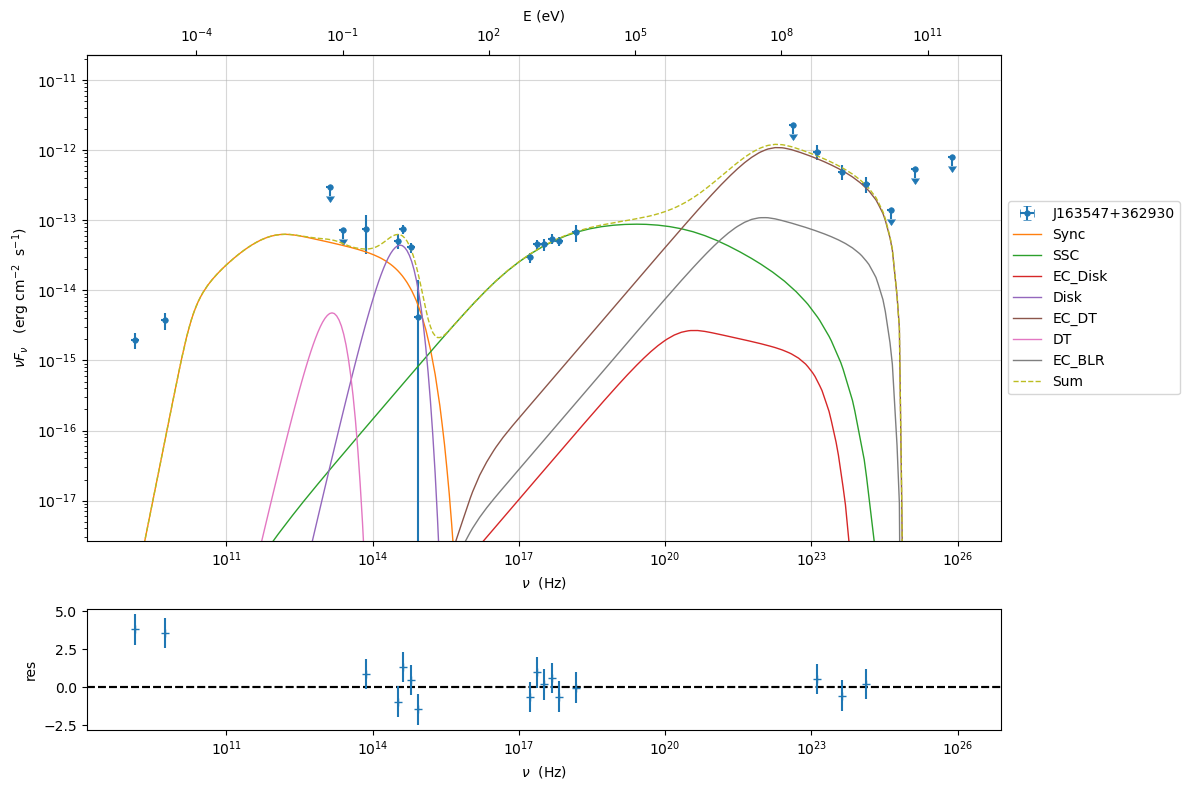

In [111]:
prefit_jet=Jet(name='jet_leptonic',electron_distribution='bkn',beaming_expr='bulk_theta')
prefit_jet.add_EC_component(['EC_Disk',"EC_DT","EC_BLR"],disk_type='MultiBB')
prefit_jet.add_user_par(name='theta_open',val=3,units='deg')
prefit_jet.make_dependent_par(par='R', depends_on=['R_H','theta_open'],
                              par_expr='np.tan((theta_open*np.pi/180))*R_H')
prefit_jet.make_dependent_par(par='R_BLR_in', depends_on=['L_Disk'], par_expr='3E17*(L_Disk/1E46)**0.5')
prefit_jet.make_dependent_par(par='R_BLR_out', depends_on=['R_BLR_in'], par_expr='R_BLR_in*1.1')
prefit_jet.make_dependent_par(par='R_DT', depends_on=['L_Disk'], par_expr='2E19*(L_Disk/1E46)**0.5')

gmin=1.00
gmax=20000.00
N=702.2429
gamma_break=823.9845
p=1.374243
p_1=3.30019
T_DT=836.6683
R_DT=2.364663e+19
tau_DT=0.1
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.083
M_BH=999404000
tau_BLR=0.1
R_BLR_in=3.546995e+17
R_BLR_out=3.901695e+17
L_Disk=1.397908e+46
R=7.878364e+16
R_H=1.503281e+18
B=0.06719232
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3

prefit_jet.set_par('gmin',val=gmin)
prefit_jet.set_par('gmax',val=gmax)
prefit_jet.set_par('N',val=N)
prefit_jet.set_par('gamma_break',val=gamma_break)
prefit_jet.set_par('p',val=p)
prefit_jet.set_par('p_1',val=p_1)
prefit_jet.set_par('R_inner_Sw',val=R_inner_Sw)
prefit_jet.set_par('R_ext_Sw',val=R_ext_Sw)
prefit_jet.set_par('accr_eff',val=accr_eff)
prefit_jet.set_par('M_BH',val=M_BH)
prefit_jet.set_par('T_DT',val=T_DT)
prefit_jet.set_par('tau_DT',val=tau_DT)
prefit_jet.set_par('tau_BLR',val=tau_BLR)
prefit_jet.set_par('L_Disk',val=L_Disk)
prefit_jet.set_par('R_H',val=R_H)
prefit_jet.set_par('B',val=B)
prefit_jet.set_par('theta',val=theta)
prefit_jet.set_par('theta',val=theta_open)
prefit_jet.set_par('BulkFactor',val=BulkFactor)
prefit_jet.set_par('z_cosm',val=z_cosm)
prefit_jet.eval()
prefit_jet.show_model()
#prefit_jet.save_model('prefit_SSD.pkl')
p=prefit_jet.plot_model(sed_data=sed_data, frame='obs')
p.add_residual_plot(prefit_jet,sed_data)
#p.save('prefit_jet.png')

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,1.374243e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300190e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,False
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,False
jet_leptonic,accr_eff,Disk,,8.300000e-02,0.000000e+00,--,False,False
jet_leptonic,M_BH,Disk,M_sun*,9.994040e+08,0.000000e+00,--,False,False



--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 1.000000e+00
 gmax grid : 2.000000e+04
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e-01

accretion disk:
 disk Type: MultiBB
 L disk: 9.785356e+45 (erg/s)
 T disk: 2.751217e+04 (K)
 nu peak disk: 2.248243e+15 (Hz)
 Sw radius 2.951779e+14 (cm)
 L Edd. 1.665730e+47 (erg/s)
 accr_rate: 3.028544e+00 (M_sun/yr)
 accr_rate Edd.: 5.155394e+01 (M_sun/yr)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_Disk, state: on
   name:Disk, state: on
   name:EC_DT, state: on


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,1.374243e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300190e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,False
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,False
jet_leptonic,accr_eff,Disk,,5.700000e-02,0.000000e+00,--,False,False
jet_leptonic,M_BH,Disk,M_sun*,9.994040e+08,0.000000e+00,--,False,False


--------------------------------------------------------------------------------


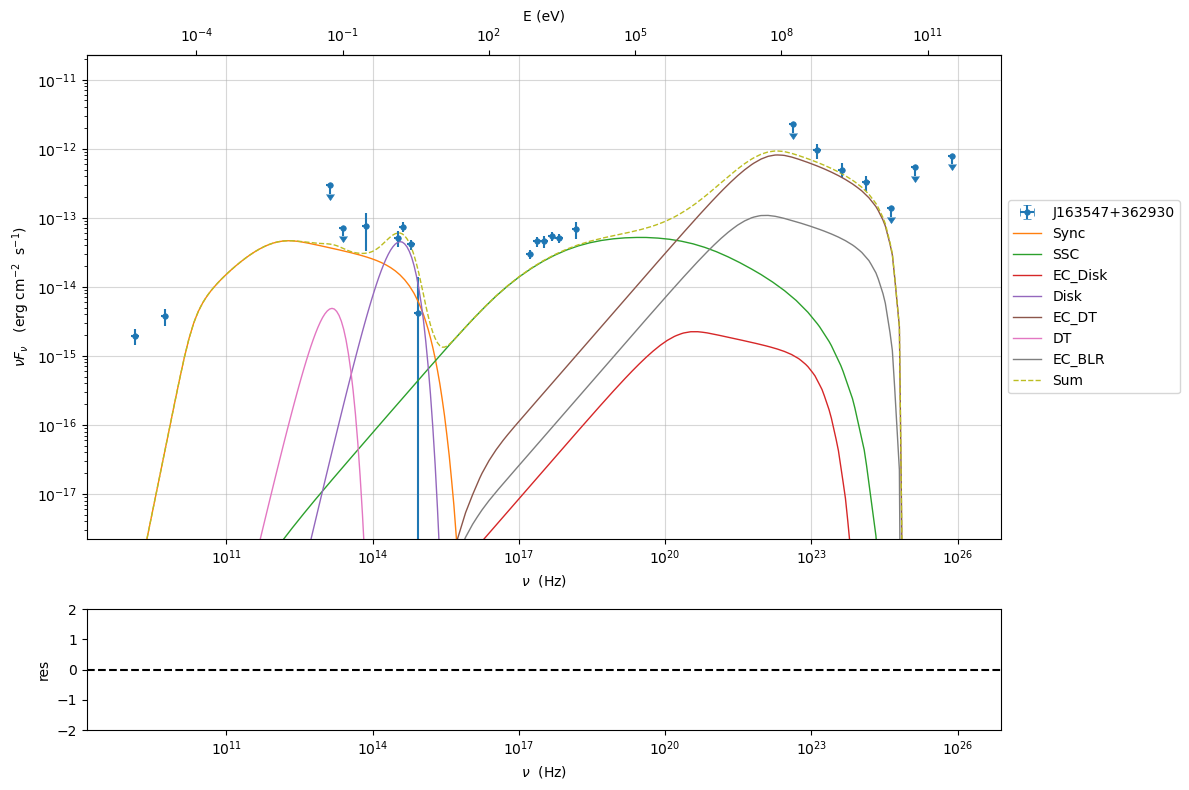

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.65452e+01

fit run: 1
- old chisq=3.65452e+01


0it [00:00, ?it/s]

- best chisq=3.65452e+01

fit run: 2
- old chisq=3.65452e+01


0it [00:00, ?it/s]

- best chisq=3.65452e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.057$


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,2.076633e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,True
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,True
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,True
jet_leptonic,p,LE_spectral_slope,,1.374243e+00,-1.000000e+01,1.000000e+01,False,True
jet_leptonic,p_1,HE_spectral_slope,,3.300190e+00,-1.000000e+01,1.000000e+01,False,True
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,True
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,True
jet_leptonic,accr_eff,Disk,,5.700000e-02,0.000000e+00,--,False,True
jet_leptonic,M_BH,Disk,M_sun*,1.075162e+09,0.000000e+00,--,False,False



converged=True
calls=166
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 36.55                      │              Nfcn = 166              │
│ EDM = 0.0052 (Goal: 0.0002)      │           time = 52.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │    2.1    │    0.4    │            │            │    1    │   10    │       │
│ 1 │ par_1 │  1.08e9   │  0.22e9   │            │            │  8e+08  │  2e+09  │       │
│ 2 │ par_2 │9.78535e45 │0.00014e45 │            │            │2.79582e+45│6.29059e+46│       │
│ 3 │ par_3 │1.202626e18│0.000016e18│            │            │3.00656e+17│3.00656e+18│       │
│ 4 │ par_4 │   0.080   │   0.008   │            │            │0.0134385│0.134385 │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4 │
├───────┼───────────────────────────────────────────────────┤
│ par_0 │     0.181 -3.75e+07 -4.86e+39 -1.47e+11  -0.00327 │
│ par_1 │ -3.75e+07  4.98e+16  1.01e+48  2.99e+19  8.58e+05 │
│ par_2 │ -4.86e+39  1.01e+48  2.07e+82 -8.63e+53  8.54e+37 │
│ par_3 │ -1.47e+11  2.99e+19 -8.63e+53  2.51e+26  2.53e+09 │
│ par_4 │  -0.00327  8.58e+05  8.54e+37  2.53e+09  7.04e-05 │
└───────┴───────────────────────────────────────────────────┘

dof=17
chisq=36.545205, chisq/red=2.149718 null hypothesis sig=0.003876

stats without the UL
dof  UL=11
chisq=36.310351, chisq/red=3.300941 null hypothesis sig=0.000150


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,2.076633e+00,2.076633e+00,4.243540e-01,--,1.000000e+00,1.000000e+00,1.000000e+01,False
jet_leptonic,gmax,2.000000e+04,--,--,--,2.000000e+04,1.000000e+00,1.000000e+15,True
jet_leptonic,N,7.022429e+02,--,--,--,7.022429e+02,0.000000e+00,--,True
jet_leptonic,gamma_break,8.239845e+02,--,--,--,8.239845e+02,1.000000e+00,1.000000e+09,True
jet_leptonic,p,1.374243e+00,--,--,--,1.374243e+00,-1.000000e+01,1.000000e+01,True
jet_leptonic,p_1,3.300190e+00,--,--,--,3.300190e+00,-1.000000e+01,1.000000e+01,True
jet_leptonic,R_inner_Sw,1.169233e+01,--,--,--,1.169233e+01,0.000000e+00,--,True
jet_leptonic,R_ext_Sw,6.239621e+01,--,--,--,6.239621e+01,0.000000e+00,--,True
jet_leptonic,accr_eff,5.700000e-02,--,--,--,5.700000e-02,0.000000e+00,--,True
jet_leptonic,M_BH,1.075162e+09,1.075162e+09,2.158641e+08,--,9.994040e+08,8.000000e+08,2.000000e+09,False


-------------------------------------------------------------------------


19.02661974912703


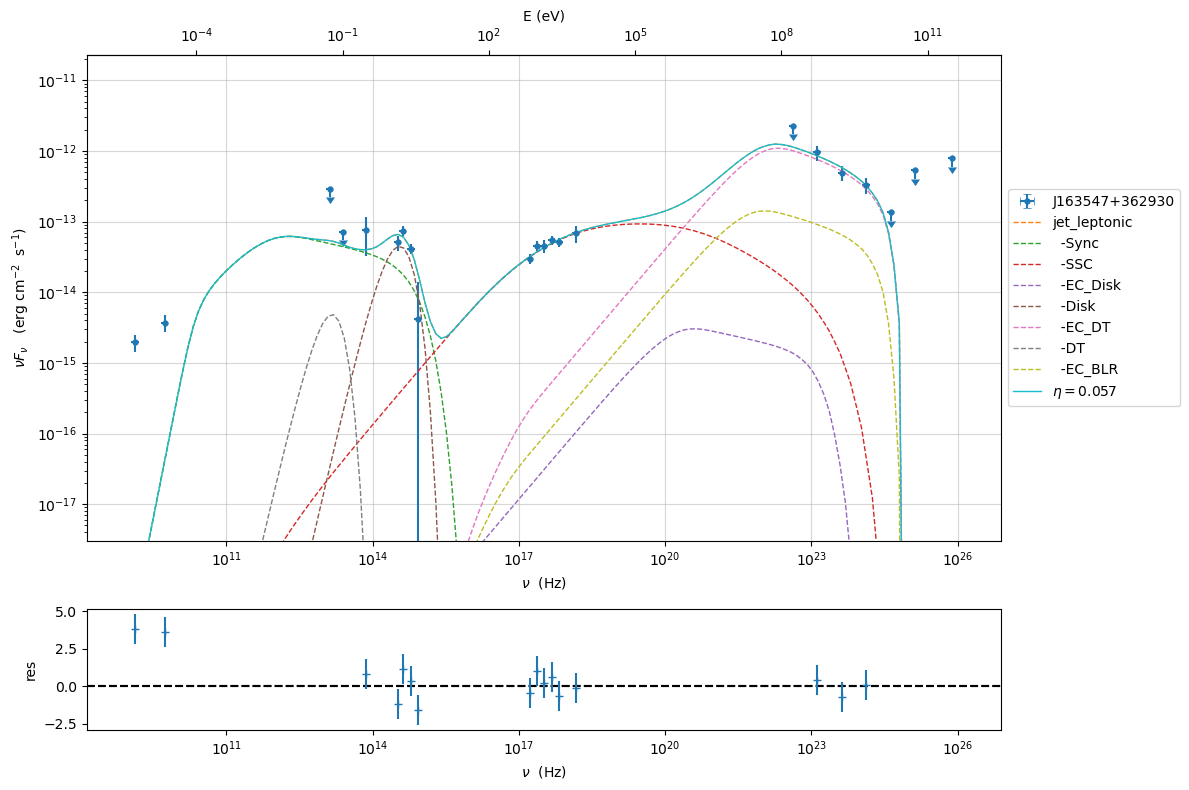

In [18]:
jet_5=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_5.set_par('accr_eff',val=0.057)
jet_5.set_par('L_Disk',val=L_Disk*0.7)
jet_5.set_par('R_H',val=R_H*0.8)
jet_5.set_par('B',val=B*1.2)

jet_5.eval()
jet_5.show_model()

p=jet_5.plot_model(sed_data=sed_data)
plt.show()

fit_model_5=FitModel(jet=jet_5, name=r'$\eta = 0.057$',template=None)

fit_model_5.free('jet_leptonic','R_H')
#fit_model_5.freeze('jet_leptonic','B')
fit_model_5.freeze('jet_leptonic','theta')
fit_model_5.freeze('jet_leptonic','theta_open')
fit_model_5.freeze('jet_leptonic','BulkFactor')
fit_model_5.freeze('jet_leptonic','z_cosm')
#fit_model_5.freeze('jet_leptonic','gmin')
fit_model_5.freeze('jet_leptonic','gmax')
fit_model_5.freeze('jet_leptonic','N')
fit_model_5.freeze('jet_leptonic','gamma_break')
fit_model_5.freeze('jet_leptonic','p')
fit_model_5.freeze('jet_leptonic','p_1')
fit_model_5.freeze('jet_leptonic','R_inner_Sw')
fit_model_5.freeze('jet_leptonic','R_ext_Sw')
fit_model_5.freeze('jet_leptonic','accr_eff')
#fit_model_5.freeze('jet_leptonic','M_BH')
fit_model_5.freeze('jet_leptonic','T_DT')
#fit_model_5.freeze('jet_leptonic','L_Disk')
fit_model_5.freeze('jet_leptonic','tau_BLR')
fit_model_5.freeze('jet_leptonic','tau_DT')

fit_model_5.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,1.0e+01]
#fit_model_5.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
#fit_model_5.jet_leptonic.parameters.N.fit_range=[1.00e+02,1.00e+03]
#fit_model_5.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
#fit_model_5.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.60e+00]
#fit_model_5.jet_leptonic.parameters.p_1.fit_range=[3.50e+00,3.80e+00]
#fit_model_5.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_5.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_5.jet_leptonic.parameters.M_BH.fit_range=[8.0000e+08,2.0000e+9]
#fit_model_5.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_5.jet_leptonic.parameters.L_Disk.fit_range=[L_Disk*0.20,L_Disk*4.50]
fit_model_5.jet_leptonic.parameters.R_H.fit_range=[R_H*0.2,R_H*2.00]
fit_model_5.jet_leptonic.parameters.B.fit_range=[B*0.20,B*2.00]
#fit_model_5.jet_leptonic.parameters.BulkFactor.fit_range=[10.00,25.00]


fit_model_5.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_5,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.057$',repeat=3, use_UL=True)
fit_model_5.eval()
best_fit_minuit.save_report('Report_best_fit_model_5_1.pkl')
fit_model_5.save_model('fit_model_5_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_5_1.pkl')
#fit_model_5.show_model()
#fit_model_5.jet_leptonic.energetic_report()
p2=fit_model_5.plot_model(sed_data=sed_data)
#p2.save('fit_model_5.png')
print(fit_model_5.jet_leptonic.get_beaming())

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,1.374243e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300190e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,False
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,False
jet_leptonic,accr_eff,Disk,,8.300000e-02,0.000000e+00,--,False,False
jet_leptonic,M_BH,Disk,M_sun*,9.994040e+08,0.000000e+00,--,False,False


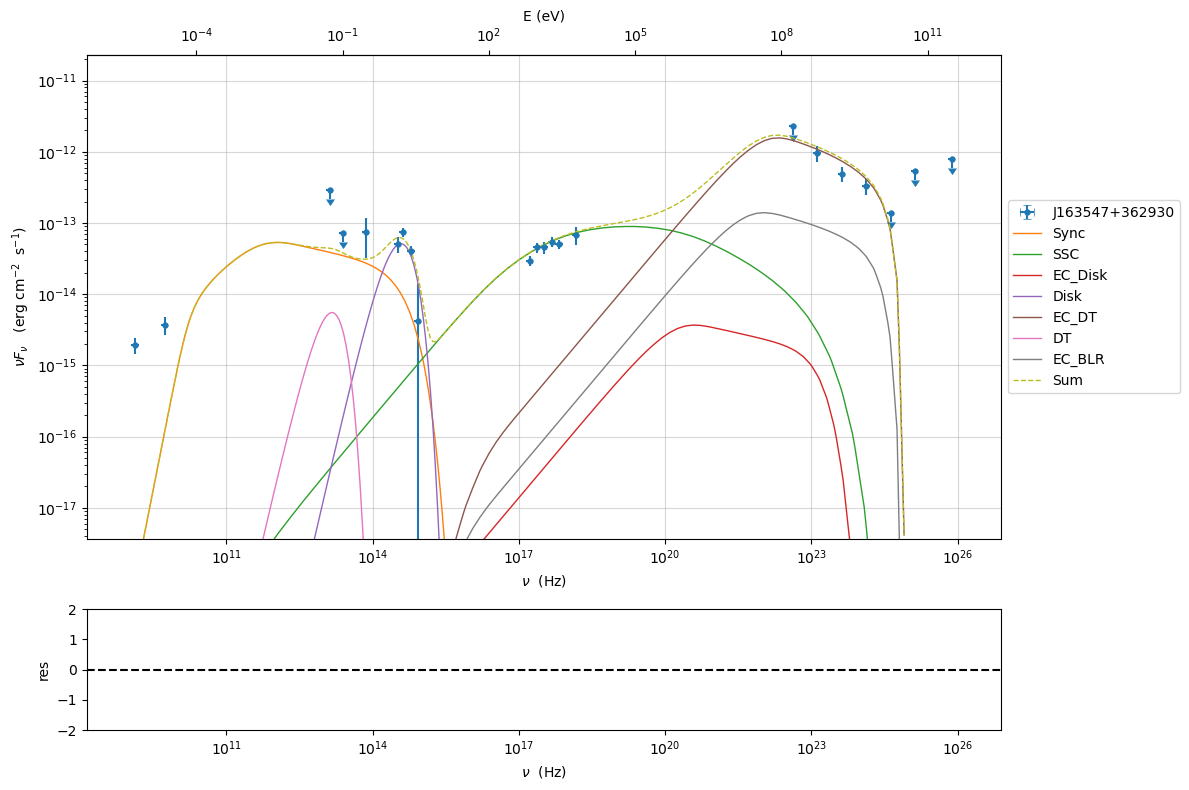

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.52746e+01

fit run: 1
- old chisq=3.52746e+01


0it [00:00, ?it/s]

- best chisq=3.52702e+01

fit run: 2
- old chisq=3.52702e+01


0it [00:00, ?it/s]

- best chisq=3.52700e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.100$


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.185513e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.733344e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,4.149383e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.339240e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,1.334985e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.336864e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,True
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,True
jet_leptonic,accr_eff,Disk,,1.000000e-01,0.000000e+00,--,False,True
jet_leptonic,M_BH,Disk,M_sun*,1.075881e+09,0.000000e+00,--,False,False



converged=True
calls=476
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.27                      │              Nfcn = 476              │
│ EDM = 3.36e+03 (Goal: 0.0002)    │           time = 145.8 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  1.1855   │  0.0029   │            │            │    1    │   10    │       │
│ 1 │ par_1 │   17e3    │    5e3    │            │            │  10000  │  40000  │       │
│ 2 │ par_2 │  0.41e3   │  0.19e3   │            │            │   100   │  3000   │       │
│ 3 │ par_3 │    834    │     6     │            │            │    1    │  1e+09  │       │
│ 4 │ par_4 │   1.33    │   0.16    │            │            │   1.3   │   1.6   │       │
│ 5 │ par_5 │   3.34    │   0.11    │            │            │   3.3   │   3.8   │       │
│ 6 │ par_6 │  1.08e9   │  0.23e9   │            │            │  8e+08  │  5e+09  │       │
│ 7 │ par_7 │ 19.57e45  │  0.12e45  │            │            │2.79582e+45│6.29059e+46│       │
│ 8 │ par_8 │ 1.8057e18 │ 0.0009e18 │            │            │3.00656e+17│3.00656e+18│       │
│ 9 │ par_9 │ 61.68e-3  │  0.07e-3  │            │            │0.0134385│0.134385 │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8     par_9 │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │  8.67e-06    0.0121 -0.000607  7.89e-09  2.75e-07  2.22e-07       315  4.47e+36  2.78e+08 -1.14e-12 │
│ par_1 │    0.0121  2.77e+07 -4.32e+04       391       -63       416  7.35e+11  9.48e+45  7.38e+17   -0.0018 │
│ par_2 │ -0.000607 -4.32e+04  3.55e+04        -4      21.6     -4.08  3.71e+07  3.52e+42  3.87e+14 -1.25e-05 │
│ par_3 │  7.89e-09       391        -4        38   0.00639     0.032  6.28e+06  1.82e+41  7.45e+12 -2.04e-08 │
│ par_4 │  2.75e-07       -63      21.6   0.00639    0.0133  -0.00379 -7.41e+05 -6.78e+40 -2.34e+12  1.15e-08 │
│ par_5 │  2.22e-07       416     -4.08     0.032  -0.00379    0.0151     8e+06  1.31e+42  4.04e+13  -4.5e-08 │
│ par_6 │       315  7.35e+11  3.71e+07  6.28e+06 -7.41e+05     8e+06   5.3e+16  6.92e+50  1.25e+22     -7.61 │
│ par_7 │  4.47e+36  9.48e+45  3.52e+42  1.82e+41 -6.78e+40  1.31e+42  6.92e+50   1.4e+88  5.94e+58  5.44e+35 │
│ par_8 │  2.78e+08  7.38e+17  3.87e+14  7.45e+12 -2.34e+12  4.04e+13  1.25e+22  5.94e+58  7.98e+29  2.68e+07 │
│ par_9 │ -1.14e-12   -0.0018 -1.25e-05 -2.04e-08  1.15e-08  -4.5e-08     -7.61  5.44e+35  2.68e+07  4.63e-09 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────────────────────┘

dof=12
chisq=35.270000, chisq/red=2.939167 null hypothesis sig=0.000424

stats without the UL
dof  UL=6
chisq=35.016992, chisq/red=5.836165 null hypothesis sig=0.000004


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,1.185513e+00,1.185513e+00,2.943750e-03,--,1.000000e+00,1.000000e+00,1.000000e+01,False
jet_leptonic,gmax,1.733344e+04,1.733344e+04,5.118639e+03,--,2.000000e+04,1.000000e+04,4.000000e+04,False
jet_leptonic,N,4.149383e+02,4.149383e+02,1.870376e+02,--,7.022429e+02,1.000000e+02,3.000000e+03,False
jet_leptonic,gamma_break,8.339240e+02,8.339240e+02,6.165508e+00,--,8.239845e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,p,1.334985e+00,1.334985e+00,1.583018e-01,--,1.374243e+00,1.300000e+00,1.600000e+00,False
jet_leptonic,p_1,3.336864e+00,3.336864e+00,1.055409e-01,--,3.300190e+00,3.300000e+00,3.800000e+00,False
jet_leptonic,R_inner_Sw,1.169233e+01,--,--,--,1.169233e+01,0.000000e+00,--,True
jet_leptonic,R_ext_Sw,6.239621e+01,--,--,--,6.239621e+01,0.000000e+00,--,True
jet_leptonic,accr_eff,1.000000e-01,--,--,--,1.000000e-01,0.000000e+00,--,True
jet_leptonic,M_BH,1.075881e+09,1.075881e+09,2.283927e+08,--,9.994040e+08,8.000000e+08,5.000000e+09,False


-------------------------------------------------------------------------


19.02661974912703


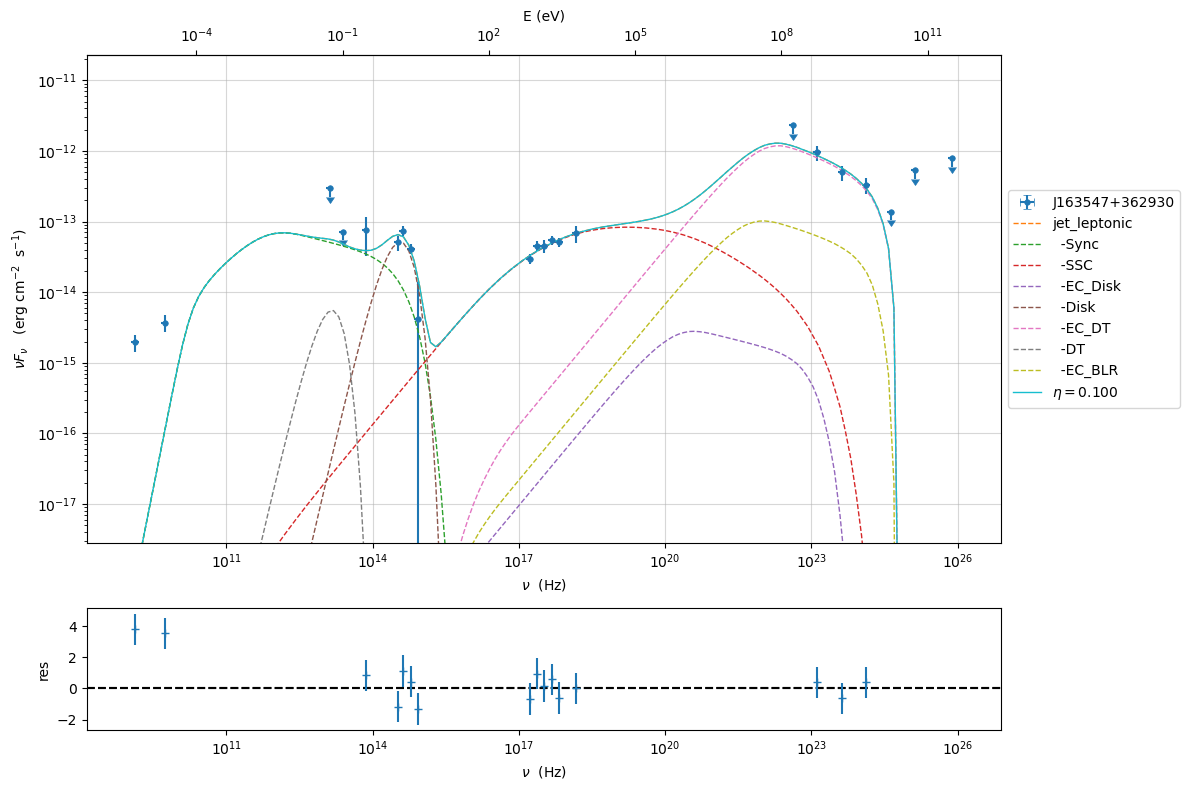

In [31]:
jet_1=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_1.set_par('accr_eff',val=0.100)
jet_1.set_par('L_Disk',val=L_Disk*1.4)
jet_1.set_par('R_H',val=R_H*1.2)
jet_1.set_par('B',val=B*0.7)

jet_1.eval()
#jet_1.show_model()

p=jet_1.plot_model(sed_data=sed_data)
plt.show()

fit_model_1=FitModel(jet=jet_1, name=r'$\eta = 0.100$',template=None)

fit_model_1.free('jet_leptonic','R_H')
#fit_model_1.freeze('jet_leptonic','B')
fit_model_1.freeze('jet_leptonic','theta')
fit_model_1.freeze('jet_leptonic','theta_open')
fit_model_1.freeze('jet_leptonic','BulkFactor')
fit_model_1.freeze('jet_leptonic','z_cosm')
#fit_model_1.freeze('jet_leptonic','gmin')
#fit_model_1.freeze('jet_leptonic','gmax')
#fit_model_1.freeze('jet_leptonic','N')
#fit_model_1.freeze('jet_leptonic','gamma_break')
#fit_model_1.freeze('jet_leptonic','p')
#fit_model_1.freeze('jet_leptonic','p_1')
fit_model_1.freeze('jet_leptonic','R_inner_Sw')
fit_model_1.freeze('jet_leptonic','R_ext_Sw')
fit_model_1.freeze('jet_leptonic','accr_eff')
#fit_model_1.freeze('jet_leptonic','M_BH')
fit_model_1.freeze('jet_leptonic','T_DT')
#fit_model_1.freeze('jet_leptonic','L_Disk')
fit_model_1.freeze('jet_leptonic','tau_BLR')
fit_model_1.freeze('jet_leptonic','tau_DT')

fit_model_1.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,1.0e+01]
fit_model_1.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
fit_model_1.jet_leptonic.parameters.N.fit_range=[1.00e+02,3.00e+03]
#fit_model_1.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
fit_model_1.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.60e+00]
fit_model_1.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#fit_model_1.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_1.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_1.jet_leptonic.parameters.M_BH.fit_range=[8.0000e+08,5.0000e+9]
#fit_model_1.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_1.jet_leptonic.parameters.L_Disk.fit_range=[L_Disk*0.20,L_Disk*4.50]
fit_model_1.jet_leptonic.parameters.R_H.fit_range=[R_H*0.2,R_H*2.00]
fit_model_1.jet_leptonic.parameters.B.fit_range=[B*0.20,B*2.00]
#fit_model_1.jet_leptonic.parameters.BulkFactor.fit_range=[10.00,25.00]


fit_model_1.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_1,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.100$',repeat=3, use_UL=True)
fit_model_1.eval()
best_fit_minuit.save_report('Report_best_fit_model_1_1.pkl')
fit_model_1.save_model('fit_model_1_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_1_1.pkl')
#fit_model_1.show_model()
#fit_model_1.jet_leptonic.energetic_report()
p2=fit_model_1.plot_model(sed_data=sed_data)
p2.save('fit_model_1_1.png')
print(fit_model_1.jet_leptonic.get_beaming())

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,1.374243e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300190e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,False
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,False
jet_leptonic,accr_eff,Disk,,8.300000e-02,0.000000e+00,--,False,False
jet_leptonic,M_BH,Disk,M_sun*,9.994040e+08,0.000000e+00,--,False,False


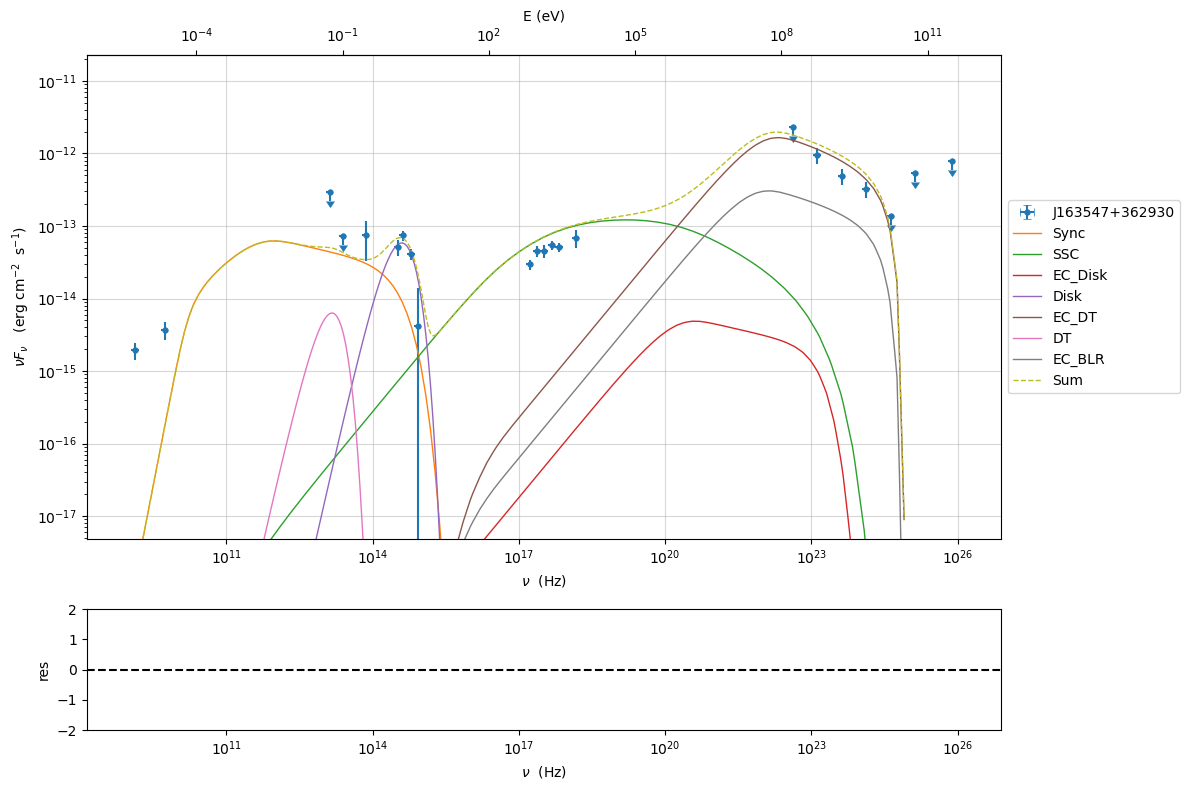

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.50982e+01

fit run: 1
- old chisq=3.50982e+01


0it [00:00, ?it/s]

- best chisq=3.50945e+01

fit run: 2
- old chisq=3.50945e+01


0it [00:00, ?it/s]

- best chisq=3.48814e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.150$


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.434428e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.720465e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,3.195157e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,True
jet_leptonic,p,LE_spectral_slope,,1.306747e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.348790e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,True
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,True
jet_leptonic,accr_eff,Disk,,1.500000e-01,0.000000e+00,--,False,True
jet_leptonic,M_BH,Disk,M_sun*,1.162126e+09,0.000000e+00,--,False,False



converged=True
calls=646
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.88                      │              Nfcn = 646              │
│ EDM = nan (Goal: 0.0002)         │           time = 198.3 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │    1.4    │    0.4    │            │            │    1    │   10    │       │
│ 1 │ par_1 │  17.2e3   │   1.2e3   │            │            │  10000  │  40000  │       │
│ 2 │ par_2 │    320    │    80     │            │            │   100   │  3000   │       │
│ 3 │ par_3 │   1.307   │   0.010   │            │            │   1.3   │   1.6   │       │
│ 4 │ par_4 │   3.35    │   0.07    │            │            │   3.3   │   3.8   │       │
│ 5 │ par_5 │  1.16e9   │  0.12e9   │            │            │  8e+08  │  5e+09  │       │
│ 6 │ par_6 │ 3.355e46  │    nan    │            │            │2.79582e+45│6.29059e+46│       │
│ 7 │ par_7 │2.1032718e18│0.0000007e18│            │            │3.00656e+17│3.00656e+18│       │
│ 8 │ par_8 │   0.048   │   0.009   │            │            │0.0134385│0.134385 │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │     0.127      -260      20.5   0.00311   0.00709  3.91e+06 -6.84e+37 -6.49e+11  -0.00107 │
│ par_1 │      -260  1.33e+06 -9.43e+03     -10.1      46.8 -4.08e+10 -1.74e+42 -4.97e+14     -4.01 │
│ par_2 │      20.5 -9.43e+03  5.69e+03     0.346      4.31 -1.18e+09  1.93e+40  2.18e+12    -0.584 │
│ par_3 │   0.00311     -10.1     0.346  9.96e-05 -9.54e-05  1.26e+05 -3.94e+36 -2.42e+10  6.12e-06 │
│ par_4 │   0.00709      46.8      4.31 -9.54e-05   0.00539 -1.01e+06   5.4e+37  1.61e+11 -0.000627 │
│ par_5 │  3.91e+06 -4.08e+10 -1.18e+09  1.26e+05 -1.01e+06  1.35e+16  -1.6e+47 -1.38e+20  2.77e+05 │
│ par_6 │ -6.84e+37 -1.74e+42  1.93e+40 -3.94e+36   5.4e+37  -1.6e+47 -8.03e+78 -1.56e+52 -4.13e+36 │
│ par_7 │ -6.49e+11 -4.97e+14  2.18e+12 -2.42e+10  1.61e+11 -1.38e+20 -1.56e+52  4.26e+23 -9.84e+09 │
│ par_8 │  -0.00107     -4.01    -0.584  6.12e-06 -0.000627  2.77e+05 -4.13e+36 -9.84e+09  8.34e-05 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=13
chisq=34.881436, chisq/red=2.683187 null hypothesis sig=0.000883

stats without the UL
dof  UL=7
chisq=34.744835, chisq/red=4.963548 null hypothesis sig=0.000012


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,1.434428e+00,1.434428e+00,3.549980e-01,--,1.000000e+00,1.000000e+00,1.000000e+01,False
jet_leptonic,gmax,1.720465e+04,1.720465e+04,1.153222e+03,--,2.000000e+04,1.000000e+04,4.000000e+04,False
jet_leptonic,N,3.195157e+02,3.195157e+02,7.531525e+01,--,7.022429e+02,1.000000e+02,3.000000e+03,False
jet_leptonic,gamma_break,8.239845e+02,--,--,--,8.239845e+02,1.000000e+00,1.000000e+09,True
jet_leptonic,p,1.306747e+00,1.306747e+00,9.896820e-03,--,1.374243e+00,1.300000e+00,1.600000e+00,False
jet_leptonic,p_1,3.348790e+00,3.348790e+00,7.046176e-02,--,3.300190e+00,3.300000e+00,3.800000e+00,False
jet_leptonic,R_inner_Sw,1.169233e+01,--,--,--,1.169233e+01,0.000000e+00,--,True
jet_leptonic,R_ext_Sw,6.239621e+01,--,--,--,6.239621e+01,0.000000e+00,--,True
jet_leptonic,accr_eff,1.500000e-01,--,--,--,1.500000e-01,0.000000e+00,--,True
jet_leptonic,M_BH,1.162126e+09,1.162126e+09,1.161944e+08,--,9.994040e+08,8.000000e+08,5.000000e+09,False


-------------------------------------------------------------------------


there are  fit warnings messages, use  the .show_fit_warnings() or access the member .minimizer._post_fit_warnings
19.02661974912703


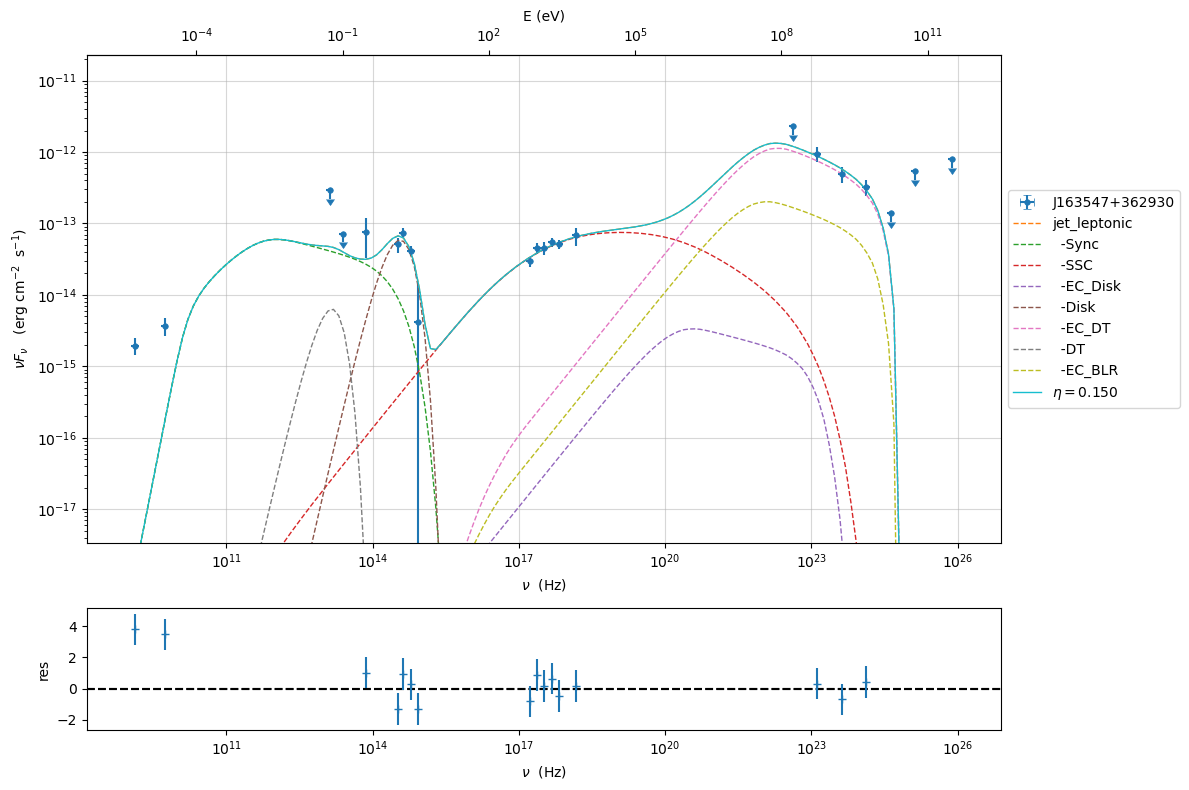

In [32]:
jet_1_5=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_1_5.set_par('accr_eff',val=0.150)
jet_1_5.set_par('L_Disk',val=L_Disk*2.4)
jet_1_5.set_par('R_H',val=R_H*1.4)
jet_1_5.set_par('B',val=B*0.6)

jet_1_5.eval()
#jet_1_5.show_model()

p=jet_1_5.plot_model(sed_data=sed_data)
plt.show()
#print(js)

fit_model_1_5=FitModel(jet=jet_1_5, name=r'$\eta = 0.150$',template=None)

fit_model_1_5.free('jet_leptonic','R_H')
#fit_model_1_5.freeze('jet_leptonic','B')
fit_model_1_5.freeze('jet_leptonic','theta')
fit_model_1_5.freeze('jet_leptonic','theta_open')
fit_model_1_5.freeze('jet_leptonic','BulkFactor')
fit_model_1_5.freeze('jet_leptonic','z_cosm')
#fit_model_1_5.freeze('jet_leptonic','gmin')
#fit_model_1_5.freeze('jet_leptonic','gmax')
#fit_model_1_5.freeze('jet_leptonic','N')
fit_model_1_5.freeze('jet_leptonic','gamma_break')
#fit_model_1_5.freeze('jet_leptonic','p')
#fit_model_1_5.freeze('jet_leptonic','p_1')
fit_model_1_5.freeze('jet_leptonic','R_inner_Sw')
fit_model_1_5.freeze('jet_leptonic','R_ext_Sw')
fit_model_1_5.freeze('jet_leptonic','accr_eff')
#fit_model_1_5.freeze('jet_leptonic','M_BH')
fit_model_1_5.freeze('jet_leptonic','T_DT')
#fit_model_1_5.freeze('jet_leptonic','L_Disk')
fit_model_1_5.freeze('jet_leptonic','tau_BLR')
fit_model_1_5.freeze('jet_leptonic','tau_DT')

fit_model_1_5.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,1.0e+01]
fit_model_1_5.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
fit_model_1_5.jet_leptonic.parameters.N.fit_range=[1.00e+02,3.00e+03]
#fit_model_1_5.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
fit_model_1_5.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.60e+00]
fit_model_1_5.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#fit_model_1_5.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_1_5.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_1_5.jet_leptonic.parameters.M_BH.fit_range=[8.0000e+08,5.0000e+9]
#fit_model_1_5.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_1_5.jet_leptonic.parameters.L_Disk.fit_range=[L_Disk*0.20,L_Disk*4.50]
fit_model_1_5.jet_leptonic.parameters.R_H.fit_range=[R_H*0.2,R_H*2.00]
fit_model_1_5.jet_leptonic.parameters.B.fit_range=[B*0.20,B*2.00]
#fit_model_1_5.jet_leptonic.parameters.BulkFactor.fit_range=[10.00,25.00]


fit_model_1_5.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_1_5,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.150$',repeat=3, use_UL=True)
fit_model_1_5.eval()
best_fit_minuit.save_report('Report_best_fit_model_1_5_1.pkl')
fit_model_1_5.save_model('fit_model_1_5_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_1_5_1.pkl')
#fit_model_1_5.show_model()
#fit_model_1_5.jet_leptonic.energetic_report()
p2=fit_model_1_5.plot_model(sed_data=sed_data)
#p2.save('fit_model_1_5.png')
print(fit_model_1_5.jet_leptonic.get_beaming())

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,1.374243e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300190e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,False
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,False
jet_leptonic,accr_eff,Disk,,8.300000e-02,0.000000e+00,--,False,False
jet_leptonic,M_BH,Disk,M_sun*,9.994040e+08,0.000000e+00,--,False,False


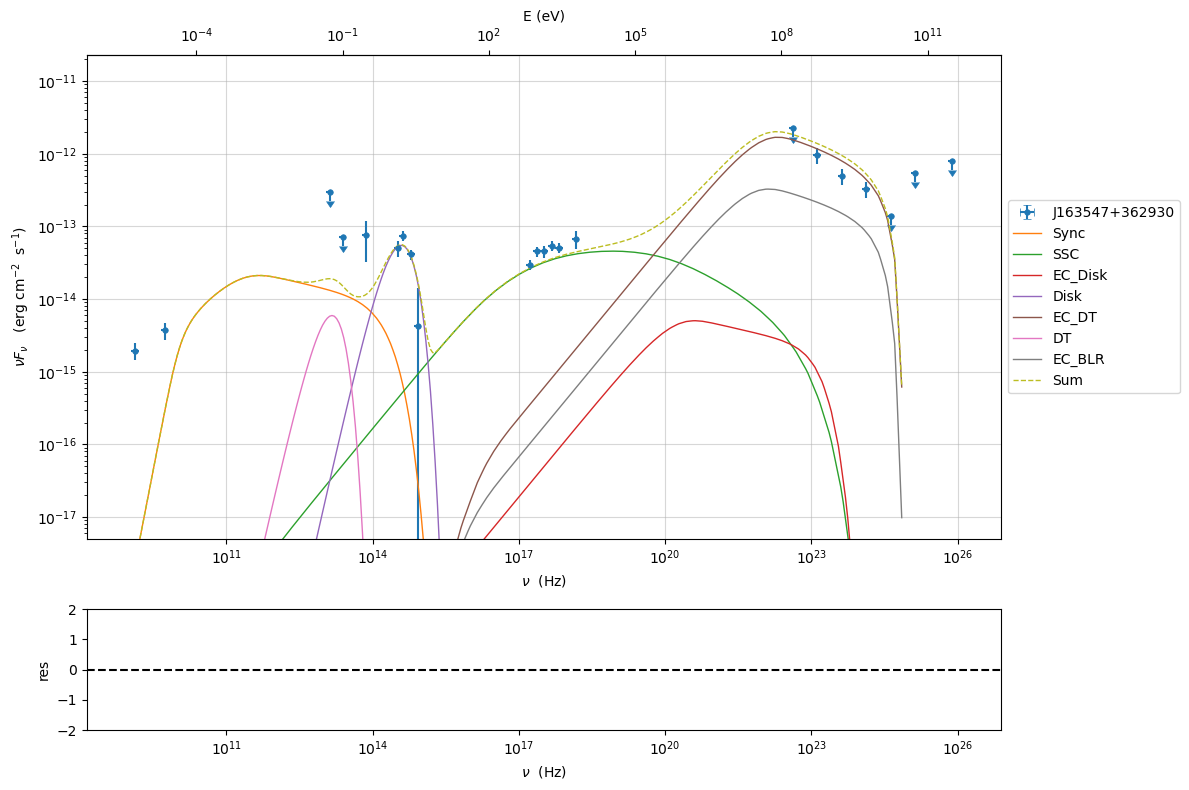

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.45675e+01

fit run: 1
- old chisq=3.45675e+01


0it [00:00, ?it/s]

- best chisq=3.45191e+01

fit run: 2
- old chisq=3.45191e+01


0it [00:00, ?it/s]

- best chisq=3.44803e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.200$


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.076988e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,1.908742e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,3.388240e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,True
jet_leptonic,p,LE_spectral_slope,,1.332103e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300766e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,True
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,True
jet_leptonic,accr_eff,Disk,,2.000000e-01,0.000000e+00,--,False,True
jet_leptonic,M_BH,Disk,M_sun*,1.113442e+09,0.000000e+00,--,False,False



converged=True
calls=858
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.48                      │              Nfcn = 858              │
│ EDM = 0.217 (Goal: 0.0002)       │           time = 259.2 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │    1.1    │    0.4    │            │            │    1    │   10    │       │
│ 1 │ par_1 │  19.1e3   │   1.5e3   │            │            │  10000  │  40000  │       │
│ 2 │ par_2 │    340    │    40     │            │            │   100   │  3000   │       │
│ 3 │ par_3 │   1.332   │   0.032   │            │            │   1.3   │   1.6   │       │
│ 4 │ par_4 │    3.3    │    0.5    │            │            │   3.3   │   3.8   │       │
│ 5 │ par_5 │ 1.1134e9  │ 0.0032e9  │            │            │  8e+08  │  5e+09  │       │
│ 6 │ par_6 │ 41.812e45 │ 0.028e45  │            │            │2.79582e+45│6.29059e+46│       │
│ 7 │ par_7 │ 2.339e18  │ 0.018e18  │            │            │3.00656e+17│3.00656e+18│       │
│ 8 │ par_8 │   0.044   │   0.009   │            │            │0.0134385│0.134385 │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │     0.123       499       -11   0.00901     0.129  1.15e+05  8.83e+42  5.84e+15   0.00289 │
│ par_1 │       499  2.27e+06 -4.46e+04      36.6       530  4.72e+08  3.62e+46  2.39e+19      11.8 │
│ par_2 │       -11 -4.46e+04  1.83e+03    -0.345       -11 -1.01e+07 -7.72e+44 -5.11e+17    -0.271 │
│ par_3 │   0.00901      36.6    -0.345    0.0011   0.00941  8.64e+03  6.61e+41  4.37e+14  0.000224 │
│ par_4 │     0.129       530       -11   0.00941     0.172  1.47e+05  1.15e+43  7.58e+15   0.00333 │
│ par_5 │  1.15e+05  4.72e+08 -1.01e+07  8.64e+03  1.47e+05  1.03e+13  1.02e+49  6.62e+21  2.97e+03 │
│ par_6 │  8.83e+42  3.62e+46 -7.72e+44  6.61e+41  1.15e+43  1.02e+49  7.92e+86  5.16e+59  2.28e+41 │
│ par_7 │  5.84e+15  2.39e+19 -5.11e+17  4.37e+14  7.58e+15  6.62e+21  5.16e+59  3.43e+32  1.51e+14 │
│ par_8 │   0.00289      11.8    -0.271  0.000224   0.00333  2.97e+03  2.28e+41  1.51e+14  7.54e-05 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=13
chisq=34.480342, chisq/red=2.652334 null hypothesis sig=0.001017

stats without the UL
dof  UL=7
chisq=34.339673, chisq/red=4.905668 null hypothesis sig=0.000015


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,1.076988e+00,1.076988e+00,3.901239e-01,--,1.000000e+00,1.000000e+00,1.000000e+01,False
jet_leptonic,gmax,1.908742e+04,1.908742e+04,1.504455e+03,--,2.000000e+04,1.000000e+04,4.000000e+04,False
jet_leptonic,N,3.388240e+02,3.388240e+02,4.275189e+01,--,7.022429e+02,1.000000e+02,3.000000e+03,False
jet_leptonic,gamma_break,8.239845e+02,--,--,--,8.239845e+02,1.000000e+00,1.000000e+09,True
jet_leptonic,p,1.332103e+00,1.332103e+00,3.240267e-02,--,1.374243e+00,1.300000e+00,1.600000e+00,False
jet_leptonic,p_1,3.300766e+00,3.300766e+00,4.549876e-01,--,3.300190e+00,3.300000e+00,3.800000e+00,False
jet_leptonic,R_inner_Sw,1.169233e+01,--,--,--,1.169233e+01,0.000000e+00,--,True
jet_leptonic,R_ext_Sw,6.239621e+01,--,--,--,6.239621e+01,0.000000e+00,--,True
jet_leptonic,accr_eff,2.000000e-01,--,--,--,2.000000e-01,0.000000e+00,--,True
jet_leptonic,M_BH,1.113442e+09,1.113442e+09,3.216108e+06,--,9.994040e+08,8.000000e+08,5.000000e+09,False


-------------------------------------------------------------------------


19.02661974912703


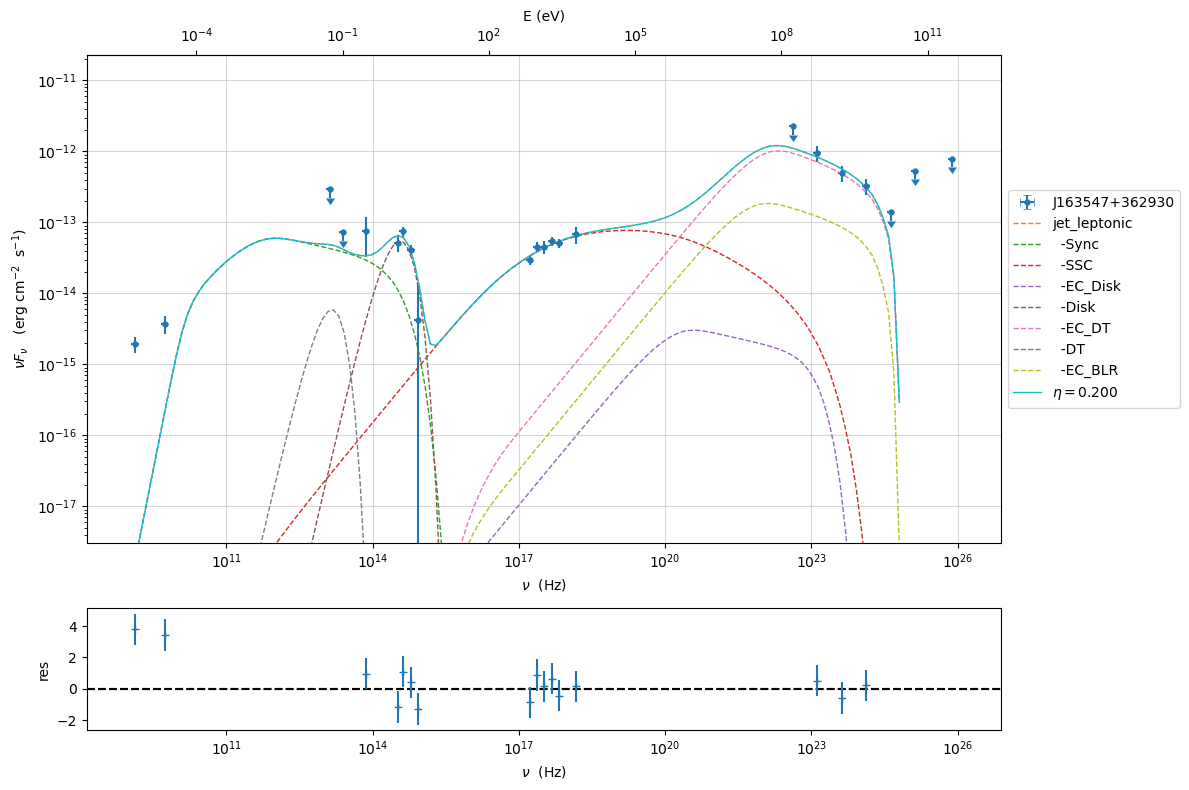

In [33]:
jet_2=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_2.set_par('accr_eff',val=0.200)
jet_2.set_par('L_Disk',val=L_Disk*3.)
jet_2.set_par('R_H',val=R_H*1.55)
jet_2.set_par('B',val=B*0.30)

jet_2.eval()
#jet_2.show_model()

p=jet_2.plot_model(sed_data=sed_data)
plt.show()
#print(js)

fit_model_2=FitModel(jet=jet_2, name=r'$\eta = 0.200$',template=None)

fit_model_2.free('jet_leptonic','R_H')
#fit_model_2.freeze('jet_leptonic','B')
fit_model_2.freeze('jet_leptonic','theta')
fit_model_2.freeze('jet_leptonic','theta_open')
fit_model_2.freeze('jet_leptonic','BulkFactor')
fit_model_2.freeze('jet_leptonic','z_cosm')
#fit_model_2.freeze('jet_leptonic','gmin')
#fit_model_2.freeze('jet_leptonic','gmax')
#fit_model_2.freeze('jet_leptonic','N')
fit_model_2.freeze('jet_leptonic','gamma_break')
#fit_model_2.freeze('jet_leptonic','p')
#fit_model_2.freeze('jet_leptonic','p_1')
fit_model_2.freeze('jet_leptonic','R_inner_Sw')
fit_model_2.freeze('jet_leptonic','R_ext_Sw')
fit_model_2.freeze('jet_leptonic','accr_eff')
#fit_model_2.freeze('jet_leptonic','M_BH')
fit_model_2.freeze('jet_leptonic','T_DT')
#fit_model_2.freeze('jet_leptonic','L_Disk')
fit_model_2.freeze('jet_leptonic','tau_BLR')
fit_model_2.freeze('jet_leptonic','tau_DT')

fit_model_2.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,1.0e+01]
fit_model_2.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
fit_model_2.jet_leptonic.parameters.N.fit_range=[1.00e+02,3.00e+03]
#fit_model_2.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
fit_model_2.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.60e+00]
fit_model_2.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#fit_model_2.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_2.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_2.jet_leptonic.parameters.M_BH.fit_range=[8.0000e+08,5.0000e+9]
#fit_model_2.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_2.jet_leptonic.parameters.L_Disk.fit_range=[L_Disk*0.20,L_Disk*4.50]
fit_model_2.jet_leptonic.parameters.R_H.fit_range=[R_H*0.2,R_H*2.00]
fit_model_2.jet_leptonic.parameters.B.fit_range=[B*0.20,B*2.00]
#fit_model_2.jet_leptonic.parameters.BulkFactor.fit_range=[10.00,25.00]


fit_model_2.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_2,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.200$',repeat=3, use_UL=True)
fit_model_2.eval()
best_fit_minuit.save_report('Report_best_fit_model_2_1.pkl')
fit_model_2.save_model('fit_model_2_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_2_1.pkl')
#fit_model_2.show_model()
#fit_model_2.jet_leptonic.energetic_report()
p2=fit_model_2.plot_model(sed_data=sed_data)
#p2.save('fit_model_2.png')
print(fit_model_2.jet_leptonic.get_beaming())

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,1.374243e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300190e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,False
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,False
jet_leptonic,accr_eff,Disk,,8.300000e-02,0.000000e+00,--,False,False
jet_leptonic,M_BH,Disk,M_sun*,9.994040e+08,0.000000e+00,--,False,False


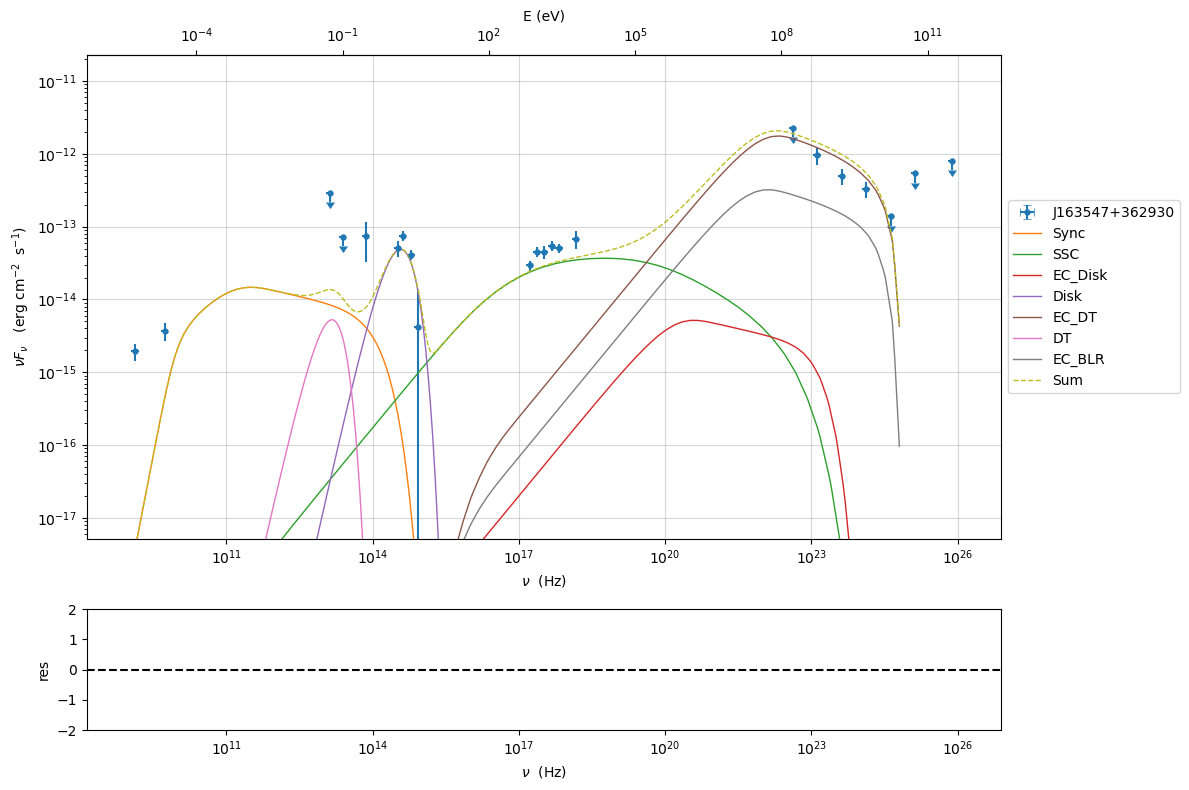

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.50973e+01

fit run: 1
- old chisq=3.50973e+01


0it [00:00, ?it/s]

- best chisq=3.50752e+01

fit run: 2
- old chisq=3.50752e+01


0it [00:00, ?it/s]

- best chisq=3.44306e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.300$


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.176841e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.412977e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,2.584211e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,True
jet_leptonic,p,LE_spectral_slope,,1.301818e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300000e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,True
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,True
jet_leptonic,accr_eff,Disk,,3.000000e-01,0.000000e+00,--,False,True
jet_leptonic,M_BH,Disk,M_sun*,9.921664e+08,0.000000e+00,--,False,False



converged=True
calls=989
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.43                      │              Nfcn = 989              │
│ EDM = 0.708 (Goal: 0.0002)       │           time = 299.3 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │    1.2    │    1.5    │            │            │    1    │   10    │       │
│ 1 │ par_1 │  0.024e6  │  0.017e6  │            │            │  10000  │  40000  │       │
│ 2 │ par_2 │    258    │    13     │            │            │   100   │  3000   │       │
│ 3 │ par_3 │   1.302   │   0.022   │            │            │   1.3   │   1.6   │       │
│ 4 │ par_4 │   3.300   │   0.027   │            │            │   3.3   │   3.8   │       │
│ 5 │ par_5 │  0.99e9   │  0.25e9   │            │            │  8e+08  │  5e+09  │       │
│ 6 │ par_6 │55.91607e45│0.00005e45 │            │            │2.79582e+45│6.98954e+46│       │
│ 7 │ par_7 │2.7059297e18│0.0000014e18│            │            │3.00656e+17│3.7582e+18│       │
│ 8 │ par_8 │  0.0356   │  0.0017   │            │            │0.00335962│0.0806308│       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │      1.13  5.14e+04     -13.4    0.0127  3.64e-07  2.49e+08  1.16e+40  4.65e+11  -0.00163 │
│ par_1 │  5.14e+04  2.34e+09  -6.1e+05       579    0.0166  1.13e+13  5.26e+44  2.12e+16     -74.2 │
│ par_2 │     -13.4  -6.1e+05       179    -0.148 -4.27e-06 -2.95e+09 -1.36e+41 -5.46e+12    0.0188 │
│ par_3 │    0.0127       579    -0.148  0.000162  4.05e-09   2.8e+06  1.29e+38  5.18e+09 -1.79e-05 │
│ par_4 │  3.64e-07    0.0166 -4.27e-06  4.05e-09  1.26e-09      79.9   3.6e+33  1.45e+05 -5.19e-10 │
│ par_5 │  2.49e+08  1.13e+13 -2.95e+09   2.8e+06      79.9  6.21e+16  2.54e+48  1.02e+20 -3.57e+05 │
│ par_6 │  1.16e+40  5.26e+44 -1.36e+41  1.29e+38   3.6e+33  2.54e+48  2.57e+81  7.74e+51 -1.68e+37 │
│ par_7 │  4.65e+11  2.12e+16 -5.46e+12  5.18e+09  1.45e+05  1.02e+20  7.74e+51   1.9e+24 -6.74e+08 │
│ par_8 │  -0.00163     -74.2    0.0188 -1.79e-05 -5.19e-10 -3.57e+05 -1.68e+37 -6.74e+08  2.88e-06 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=13
chisq=34.430646, chisq/red=2.648511 null hypothesis sig=0.001035

stats without the UL
dof  UL=7
chisq=34.211376, chisq/red=4.887339 null hypothesis sig=0.000016


best fit pars


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
jet_leptonic,gmin,1.176841e+00,1.176841e+00,1.473651e+00,--,1.000000e+00,1.000000e+00,1.000000e+01,False
jet_leptonic,gmax,2.412977e+04,2.412977e+04,1.654522e+04,--,2.000000e+04,1.000000e+04,4.000000e+04,False
jet_leptonic,N,2.584211e+02,2.584211e+02,1.338147e+01,--,7.022429e+02,1.000000e+02,3.000000e+03,False
jet_leptonic,gamma_break,8.239845e+02,--,--,--,8.239845e+02,1.000000e+00,1.000000e+09,True
jet_leptonic,p,1.301818e+00,1.301818e+00,2.158420e-02,--,1.374243e+00,1.300000e+00,1.600000e+00,False
jet_leptonic,p_1,3.300000e+00,3.300000e+00,2.670850e-02,--,3.300190e+00,3.300000e+00,3.800000e+00,False
jet_leptonic,R_inner_Sw,1.169233e+01,--,--,--,1.169233e+01,0.000000e+00,--,True
jet_leptonic,R_ext_Sw,6.239621e+01,--,--,--,6.239621e+01,0.000000e+00,--,True
jet_leptonic,accr_eff,3.000000e-01,--,--,--,3.000000e-01,0.000000e+00,--,True
jet_leptonic,M_BH,9.921664e+08,9.921664e+08,2.458177e+08,--,9.994040e+08,8.000000e+08,5.000000e+09,False


-------------------------------------------------------------------------


19.02661974912703


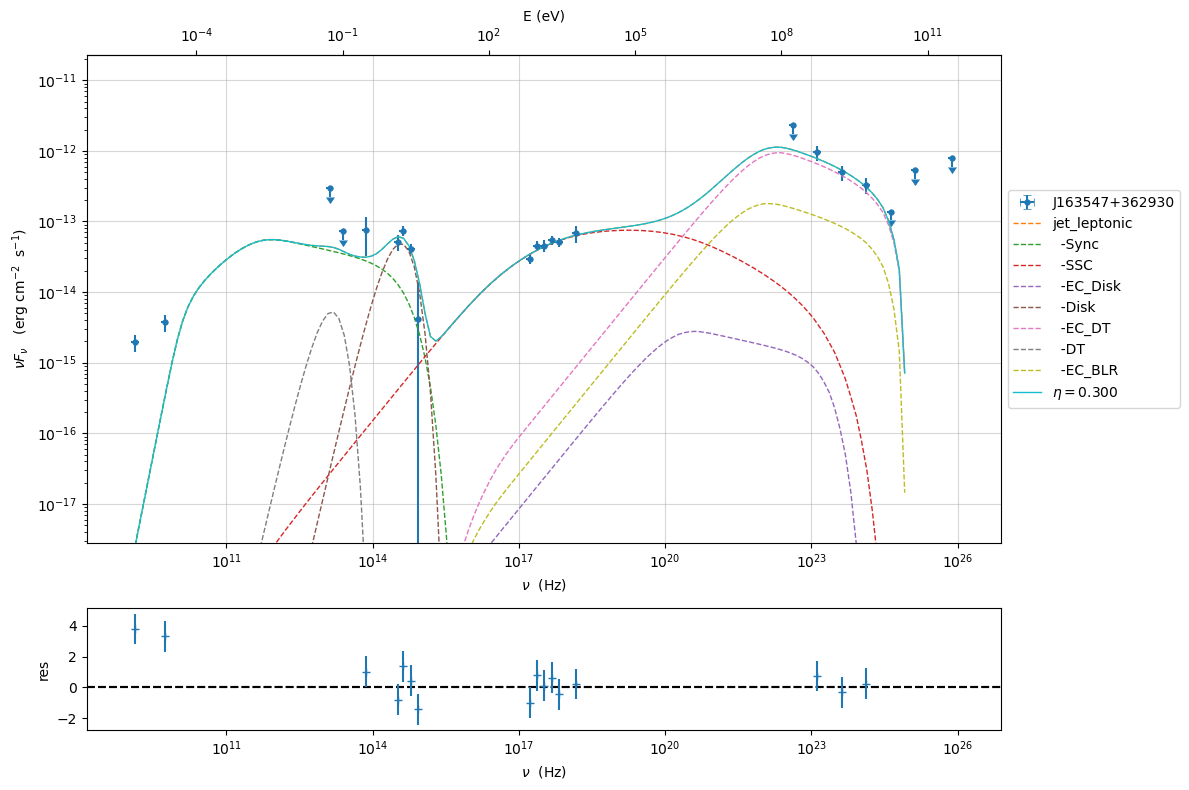

In [34]:
jet_3=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_3.set_par('accr_eff',val=0.300)
jet_3.set_par('L_Disk',val=L_Disk*4.)
jet_3.set_par('R_H',val=R_H*1.8)
jet_3.set_par('B',val=B*0.20)

jet_3.eval()
#jet_3.show_model()

p=jet_3.plot_model(sed_data=sed_data)
plt.show()

ffit_model_3=FitModel(jet=jet_3, name=r'$\eta = 0.300$',template=None)

ffit_model_3.free('jet_leptonic','R_H')
#ffit_model_3.freeze('jet_leptonic','B')
ffit_model_3.freeze('jet_leptonic','theta')
ffit_model_3.freeze('jet_leptonic','theta_open')
ffit_model_3.freeze('jet_leptonic','BulkFactor')
ffit_model_3.freeze('jet_leptonic','z_cosm')
#ffit_model_3.freeze('jet_leptonic','gmin')
#ffit_model_3.freeze('jet_leptonic','gmax')
#ffit_model_3.freeze('jet_leptonic','N')
ffit_model_3.freeze('jet_leptonic','gamma_break')
#ffit_model_3.freeze('jet_leptonic','p')
#ffit_model_3.freeze('jet_leptonic','p_1')
ffit_model_3.freeze('jet_leptonic','R_inner_Sw')
ffit_model_3.freeze('jet_leptonic','R_ext_Sw')
ffit_model_3.freeze('jet_leptonic','accr_eff')
#ffit_model_3.freeze('jet_leptonic','M_BH')
ffit_model_3.freeze('jet_leptonic','T_DT')
#ffit_model_3.freeze('jet_leptonic','L_Disk')
ffit_model_3.freeze('jet_leptonic','tau_BLR')
ffit_model_3.freeze('jet_leptonic','tau_DT')

ffit_model_3.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,1.0e+01]
ffit_model_3.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
ffit_model_3.jet_leptonic.parameters.N.fit_range=[1.00e+02,3.00e+03]
#ffit_model_3.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
ffit_model_3.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.60e+00]
ffit_model_3.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#ffit_model_3.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#ffit_model_3.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
ffit_model_3.jet_leptonic.parameters.M_BH.fit_range=[8.0000e+08,5.0000e+9]
#ffit_model_3.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
ffit_model_3.jet_leptonic.parameters.L_Disk.fit_range=[L_Disk*0.20,L_Disk*5.00]
ffit_model_3.jet_leptonic.parameters.R_H.fit_range=[R_H*0.2,R_H*2.50]
ffit_model_3.jet_leptonic.parameters.B.fit_range=[B*0.05,B*1.20]
#ffit_model_3.jet_leptonic.parameters.BulkFactor.fit_range=[10.00,25.00]


ffit_model_3.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(ffit_model_3,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.300$',repeat=3, use_UL=True)
ffit_model_3.eval()
best_fit_minuit.save_report('Report_best_ffit_model_3_1.pkl')
ffit_model_3.save_model('ffit_model_3_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_3_1.pkl')
#ffit_model_3.show_model()
#ffit_model_3.jet_leptonic.energetic_report()
p2=ffit_model_3.plot_model(sed_data=sed_data)
#p2.save('ffit_model_3.png')
print(ffit_model_3.jet_leptonic.get_beaming())

mcmc run starting



  0%|          | 0/50 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 1739.51 seconds


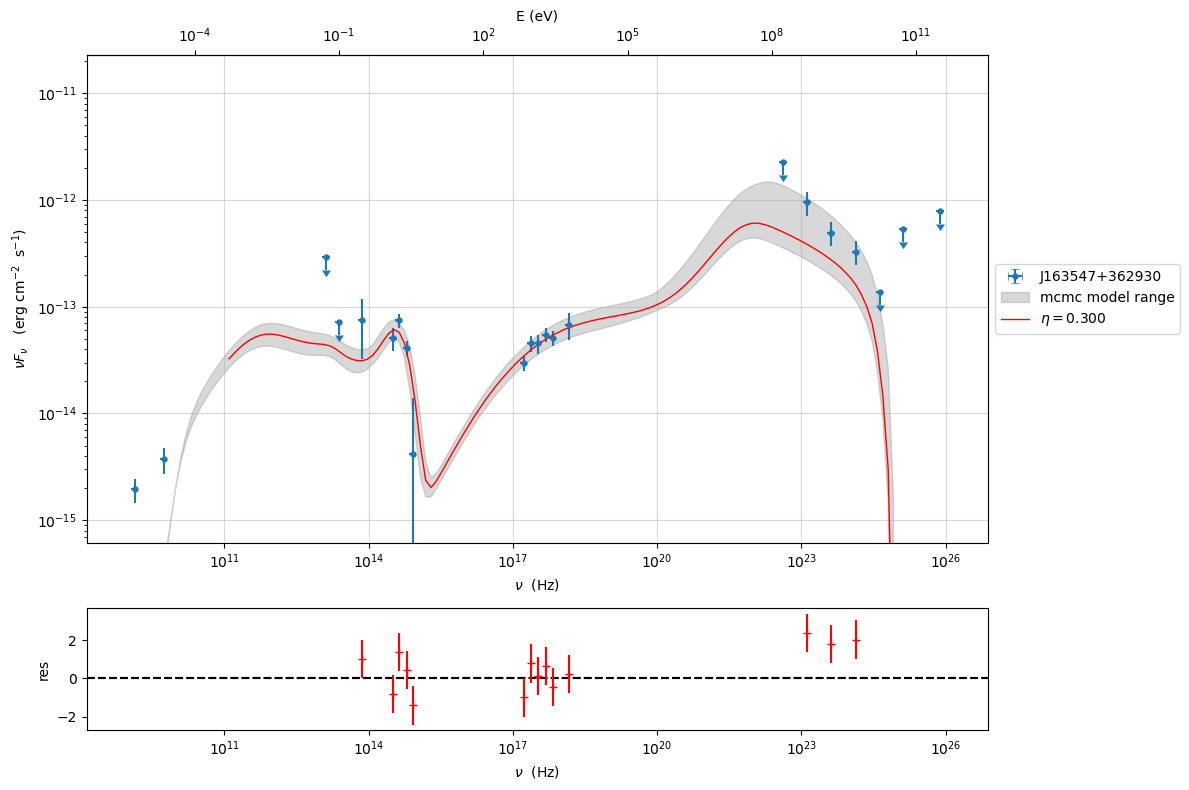

In [115]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_3_1.pkl')

mcmc=McmcSampler(model_minimizer_minuit)
mcmc.model.jet_leptonic._blob.N_THREADS=8
mcmc.model.jet_leptonic.set_external_field_transf('disk')
labels=['B','R_H','L_Disk','M_BH']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,
                 bound=5.0,bound_rel=True,threads=None,
                 walker_start_bound=0.005,use_labels_dict=use_labels_dict,
                 progress='notebook')
p=mcmc.plot_model(sed_data=sed_data,fit_range=[1E11,2E28],size=100)

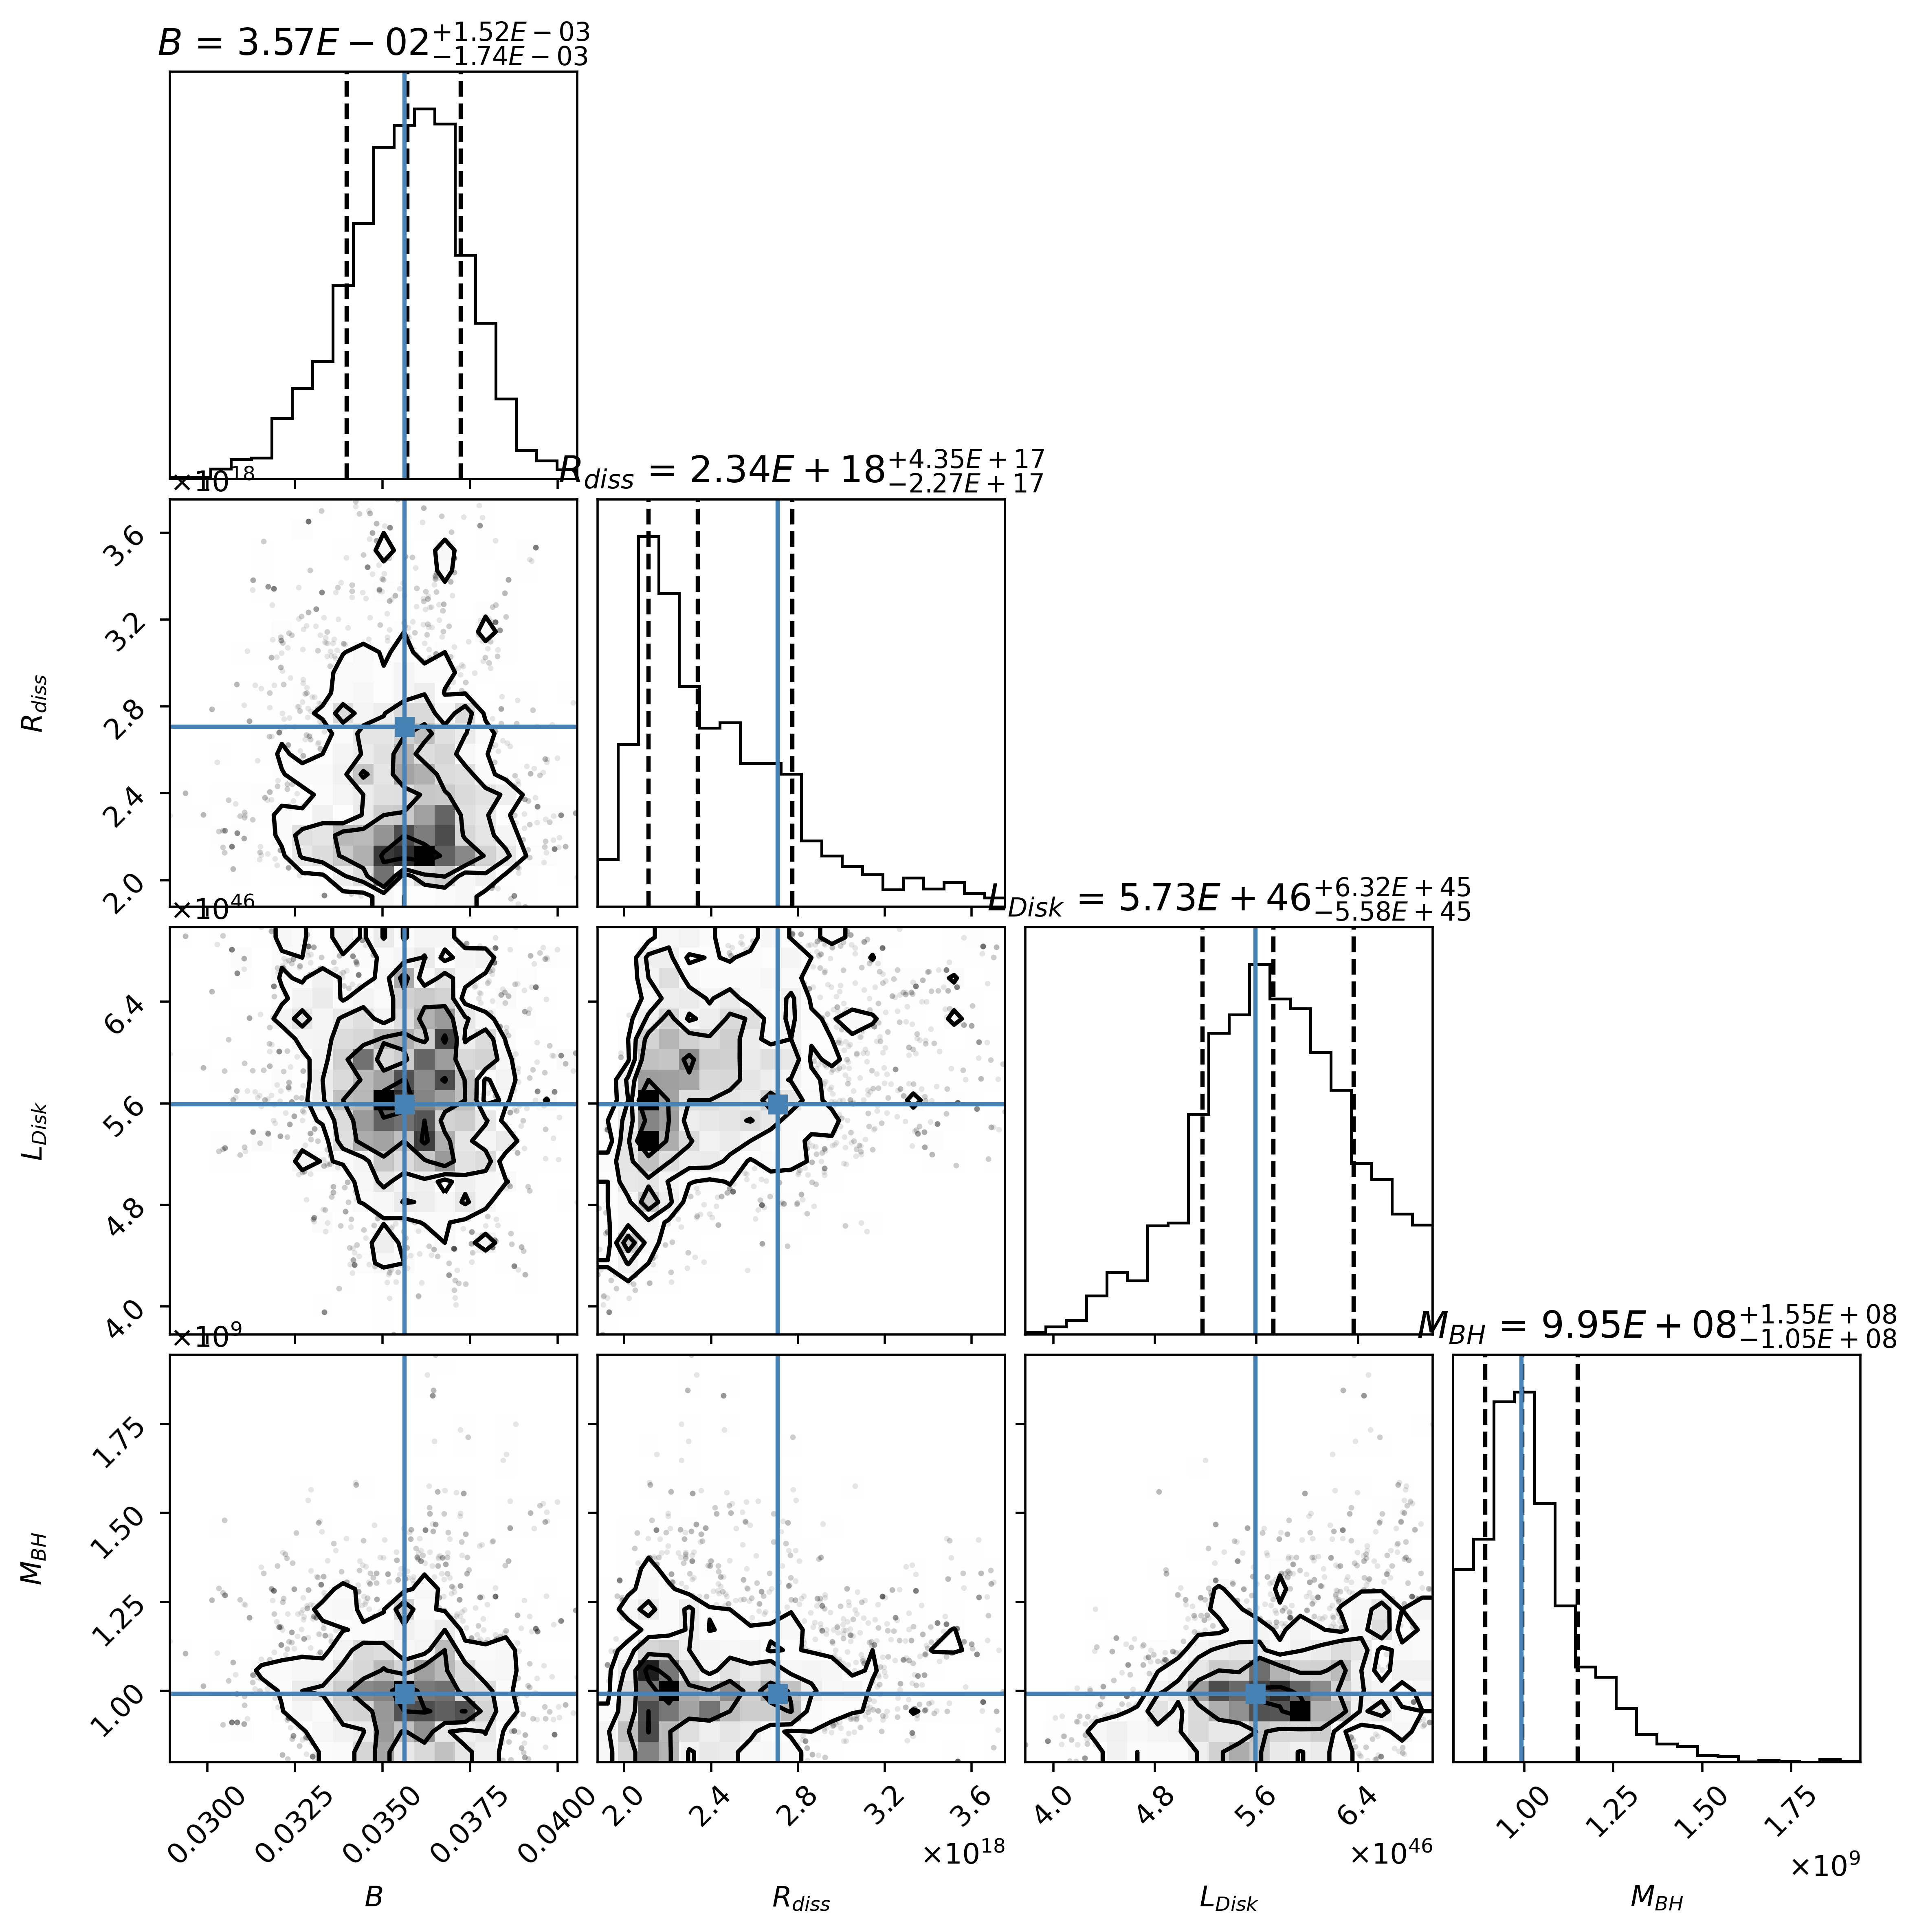

In [116]:
labes=[r'$B$',r'$R_{diss}$',r'$L_{Disk}$',r'$M_{BH}$']
plt.rcParams['figure.dpi'] = 500
from corner import corner

f=corner(mcmc.samples,labels=labes, quantiles=(0.16, 0.5, 0.84),
       truths=mcmc.labels_start_val, show_titles = True, 
       title_fmt=".2E",title_kwargs=dict(fontsize=13),
       use_math_text=True)
mcmc.save('mcmc_3_1.pkl')

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_leptonic,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_leptonic,gmax,high-energy-cut-off,lorentz-factor*,2.000000e+04,1.000000e+00,1.000000e+15,False,False
jet_leptonic,N,emitters_density,1 / cm3,7.022429e+02,0.000000e+00,--,False,False
jet_leptonic,gamma_break,turn-over-energy,lorentz-factor*,8.239845e+02,1.000000e+00,1.000000e+09,False,False
jet_leptonic,p,LE_spectral_slope,,1.374243e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,p_1,HE_spectral_slope,,3.300190e+00,-1.000000e+01,1.000000e+01,False,False
jet_leptonic,R_inner_Sw,Disk,Sw. radii*,1.169233e+01,0.000000e+00,--,False,False
jet_leptonic,R_ext_Sw,Disk,Sw. radii*,6.239621e+01,0.000000e+00,--,False,False
jet_leptonic,accr_eff,Disk,,8.300000e-02,0.000000e+00,--,False,False
jet_leptonic,M_BH,Disk,M_sun*,9.994040e+08,0.000000e+00,--,False,False


==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BL

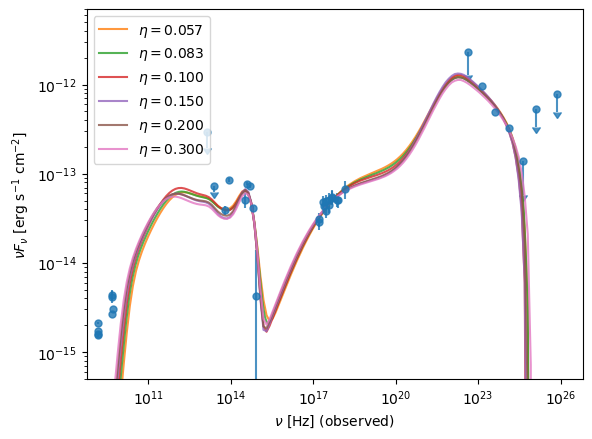

In [269]:
import pandas as pd
data_sed = pd.read_csv('sed2.txt', sep=" ", header=None)
data_sed.columns = ["x", "y", "y_err"]

x = data_sed['x'].to_numpy()
y = data_sed['y'].to_numpy()
y_err = data_sed['y_err'].to_numpy()
uplims = np.array([1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0], dtype=bool)
plt.errorbar(x, y, yerr=y_err,uplims=uplims,marker='o', markersize=5,linestyle='none', alpha=0.8)

my_jet_5=FitModel.load_model('fit_model_5_1.pkl')
nu5=my_jet_5.SED.nu
nuFnu5=my_jet_5.SED.nuFnu
plt.loglog(nu5,nuFnu5, label=r"$\eta=0.057$", alpha=0.8)
my_jet_8=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")
nu8=my_jet_8.SED.nu
nuFnu8=my_jet_8.SED.nuFnu
plt.loglog(nu8,nuFnu8, label=r"$\eta=0.083$", alpha=0.8)
my_jet_1=FitModel.load_model('fit_model_1_1.pkl')
nu1=my_jet_1.SED.nu
nuFnu1=my_jet_1.SED.nuFnu
plt.loglog(nu1,nuFnu1, label=r"$\eta=0.100$", alpha=0.8)
my_jet_1_5=FitModel.load_model('fit_model_1_5_1.pkl')
nu1=my_jet_1_5.SED.nu
nuFnu1=my_jet_1_5.SED.nuFnu
plt.loglog(nu1,nuFnu1, label=r"$\eta=0.150$", alpha=0.8)
my_jet_2=FitModel.load_model('fit_model_2_1.pkl')
nu2=my_jet_2.SED.nu
nuFnu2=my_jet_2.SED.nuFnu
plt.loglog(nu2,nuFnu2, label=r"$\eta=0.200$", alpha=0.8)
my_jet_3=FitModel.load_model('ffit_model_3_1.pkl')
nu3=my_jet_3.SED.nu
nuFnu3=my_jet_3.SED.nuFnu
plt.loglog(nu3,nuFnu3, label=r"$\eta=0.300$", alpha=0.8)


plt.ylim(5e-16,7e-12)
plt.xlim(5.5849e+8,6.3096e26)
#plt.scatter(x,y)
plt.xlabel(r"$\nu$ [Hz] (observed)")
plt.ylabel(r"$\nu F_{\nu}$ [erg s$^{-1}$ cm$^{-2}$]")
plt.legend()
plt.savefig('etas.png')
plt.show()

==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5


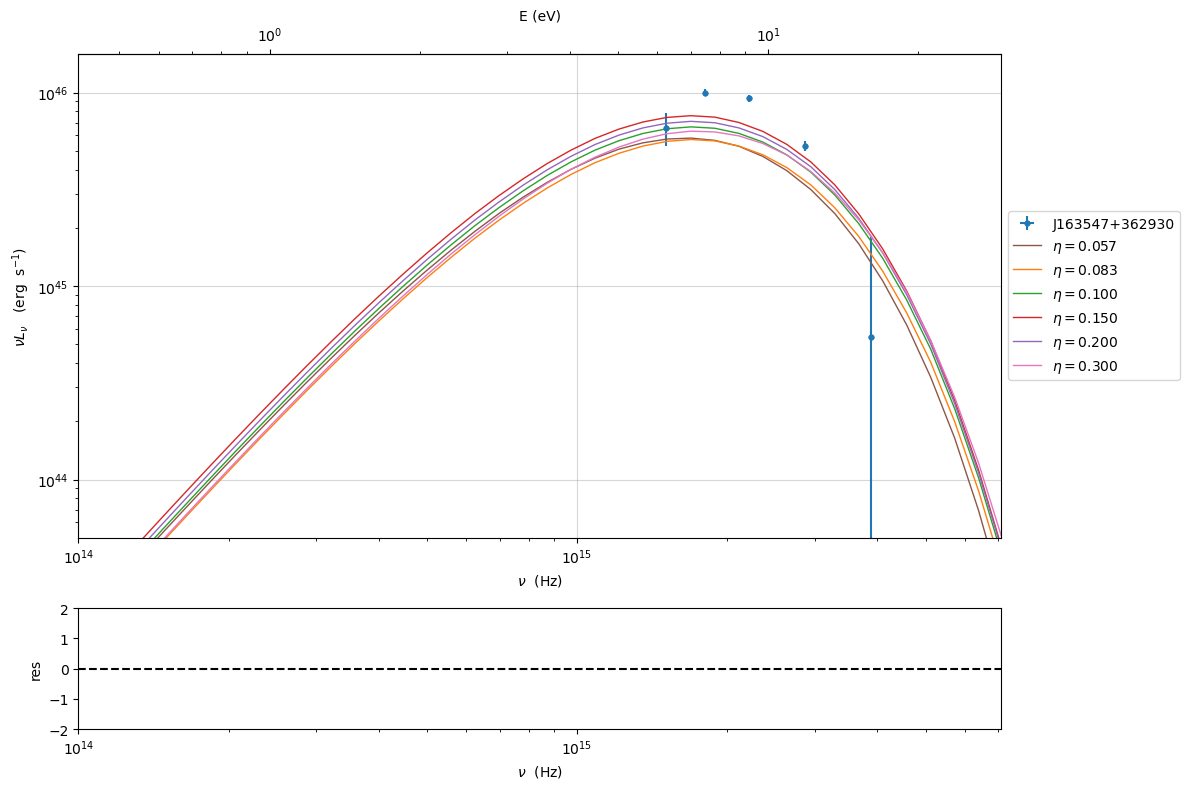

In [268]:
d=np.genfromtxt('disk.txt')
data=Data(n_rows=d.shape[0])
data.set_field('x',d[:,0])
data.set_field('y',d[:,1])
data.set_field('dy',value=d[:,2])
data.set_meta_data('z',3.647763)
data.set_meta_data('restframe','obs')
data.set_meta_data('data_scale','lin-lin')
data.set_meta_data('obj_name','J163547+362930')
sed_data=ObsData(data_table=data)

my_disc=Jet(name='JetLeptonic',electron_distribution='bkn',beaming_expr='bulk_theta')
my_disc.add_EC_component(['EC_Disk',"EC_DT","EC_BLR"],disk_type='MultiBB')
my_disc.add_user_par(name='theta_open',val=3,units='deg')
my_disc.make_dependent_par(par='R', depends_on=['R_H','theta_open'],
                              par_expr='np.tan((theta_open*np.pi/180))*R_H')
my_disc.make_dependent_par(par='R_BLR_in', depends_on=['L_Disk'], par_expr='3E17*(L_Disk/1E46)**0.5')
my_disc.make_dependent_par(par='R_BLR_out', depends_on=['R_BLR_in'], par_expr='R_BLR_in*1.1')
my_disc.make_dependent_par(par='R_DT', depends_on=['L_Disk'], par_expr='2E19*(L_Disk/1E46)**0.5')

gmin=2.076633
gmax=20000
N=702.2429
gamma_break=823.9845
p=1.374243
p_1=3.30019
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.057
M_BH=1075162000
T_DT=836.6683
R_DT=1.978419E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=2.967629E+017
R_BLR_out=3.264391E+017
L_Disk=9.785355E+045
R=6.302695E+016
R_H5=1.202626E+018
B5=0.08018776
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H5)
my_disc.set_par('B',val=B5)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(label=r'$\eta = 0.057$',comp='Disk', frame="src", sed_data=sed_data, color='#8c564b')
#my_plot.add_residual_plot(my_disc,sed_data)

gmin=1.00
gmax=20000.00
N=702.2429
gamma_break=823.9845
p=1.374243
p_1=3.30019
T_DT=836.6683
R_DT=2.364663e+19
tau_DT=0.1
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.083
M_BH=999404000
tau_BLR=0.1
R_BLR_in=3.546995e+17
R_BLR_out=3.901695e+17
L_Disk=1.397908e+46
R=7.878364e+16
R_H8=1.503281e+18
B8=0.06719232
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H8)
my_disc.set_par('B',val=B8)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.083$',comp='Disk', frame="src")
#my_plot.add_residual_plot(my_disc,sed_data)

gmin=1.185513
gmax=17333.44
N=414.9383
gamma_break=833.924
p=1.334985
p_1=3.336864
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.1
M_BH=1075881000
T_DT=836.6683
R_DT=2.798163E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=4.197245E+017
R_BLR_out=4.61697E+017
L_Disk=1.95743E+046
R=9.463508E+016
R_H1=1.805745E+018
B1=0.06168417
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H1)
my_disc.set_par('B',val=B1)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.100$',comp='Disk', frame="src")
#my_plot.add_residual_plot(my_disc,sed_data)


gmin=1.434428
gmax=17204.65
N=319.5157
gamma_break=823.9845
p=1.306747
p_1=3.34879
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.15
M_BH=1162126000
T_DT=836.6683
R_DT=3.663358E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=5.495037E+017
R_BLR_out=6.044541E+017
L_Disk=3.355049E+046
R=1.102278E+017
R_H15=2.103272E+018
B15=0.04799603
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H15)
my_disc.set_par('B',val=B15)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.150$',comp='Disk', frame="src")
#my_plot.add_residual_plot(my_disc,sed_data)

gmin=1.076988
gmax=19087.42
N=338.824
gamma_break=823.9845
p=1.332103
p_1=3.300766
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.2
M_BH=1113442000
T_DT=836.6683
R_DT=4.08962E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=6.13443E+017
R_BLR_out=6.747873E+017
L_Disk=4.181248E+046
R=1.225837E+017
R_H2=2.339037E+018
B2=0.04359173
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3

my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H2)
my_disc.set_par('B',val=B2)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.200$',comp='Disk', frame="src")
#my_plot.add_residual_plot(my_disc,sed_data)

gmin=1.176841
gmax=24129.77
N=258.4211
gamma_break=823.9845
p=1.301818
p_1=3.3
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.3
M_BH=992166400
T_DT=836.6683
R_DT=4.729316E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=7.093974E+017
R_BLR_out=7.803371E+017
L_Disk=5.591607E+046
R=1.418118E+017
R_H3=2.70593E+018
B3=0.03563369
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3

my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H3)
my_disc.set_par('B',val=B3)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.300$',comp='Disk', frame="src", color="#e377c2")

my_plot.setlim(x_min=10**14, x_max=10**15.85, y_min=10**43.699, y_max=10**46.2)
my_plot.save('disk_diff.png')

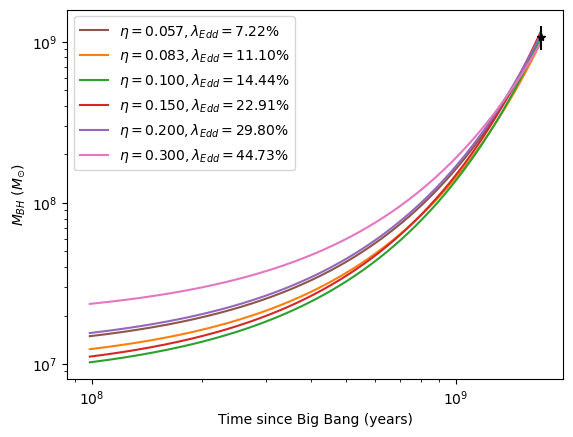

In [271]:
import numpy as np
eta=np.array([0.057,0.083,0.100,0.150,0.200,0.300])
L=np.array([9.785355e+45,1.397908e+46,1.957430e+46,3.355049e+46,4.181248e+46,5.591607e+46])
M_now=np.array([1.075162e+09,9.994040e+08,1.075881e+09,1.162126e+09,1.113442e+09,9.921664e+08])

#L_Edd= np.array([1.791997e+47,1.665730e+47,1.793196e+47,1.936942e+47,1.855799e+47,1.653667e+47]) #Given by JetSeT
L_Edd = (1.26e38)*M_now
ratio = L/L_Edd

tau = 0.45*(eta/(1-eta))*(1/ratio)*1e9 # Belladitta 2022; Shapiro 2005; Volonteri & Rees 2005

z30 = int(9.864900E+07) #Using the calculator https://www.astro.ucla.edu/~wright/CosmoCalc.html & Planck 2018
z3  = int(1.710e+09)

M_seed = M_now*np.exp((z30-z3)/tau)

t = np.linspace(z30,z3,1000) 

M = np.zeros((len(M_now),len(t)))
for i in range(len(M_now)):
    for j in range(len(t)):
        if j==0:
            M[i][j] = M_seed[i]            
        b = np.exp((j*(z3-z30)/1000)/(tau[i]))
        M[i][j] = M_seed[i]*(b)

        
plt.loglog(t,M[0], label=fr"$\eta={eta[0]:.3f}, \lambda_{{Edd}}={ratio[0]*100:.2f}\%$", color='#8c564b')
plt.loglog(t,M[1], label=fr"$\eta={eta[1]:.3f}, \lambda_{{Edd}}={ratio[1]*100:.2f}\%$", color='#ff7f0e')
plt.loglog(t,M[2], label=fr"$\eta={eta[2]:.3f}, \lambda_{{Edd}}={ratio[2]*100:.2f}\%$", color='#2ca02c')
plt.loglog(t,M[3], label=fr"$\eta={eta[3]:.3f}, \lambda_{{Edd}}={ratio[3]*100:.2f}\%$", color='#d62728')
plt.loglog(t,M[4], label=fr"$\eta={eta[4]:.3f}, \lambda_{{Edd}}={ratio[4]*100:.2f}\%$", color='#9467bd')
plt.loglog(t,M[5], label=fr"$\eta={eta[5]:.3f}, \lambda_{{Edd}}={ratio[5]*100:.2f}\%$", color='#e377c2')
plt.errorbar(z3,np.mean(M_now),yerr=np.std(M_now)*3, marker="*", color="k")
#plt.ylim(2e7, 2e10)
plt.xlabel("Time since Big Bang (years)")
plt.ylabel(r"$M_{BH}$ ($M_{\odot}$)")
plt.legend()
plt.savefig('BH_evolution.png')
plt.show()

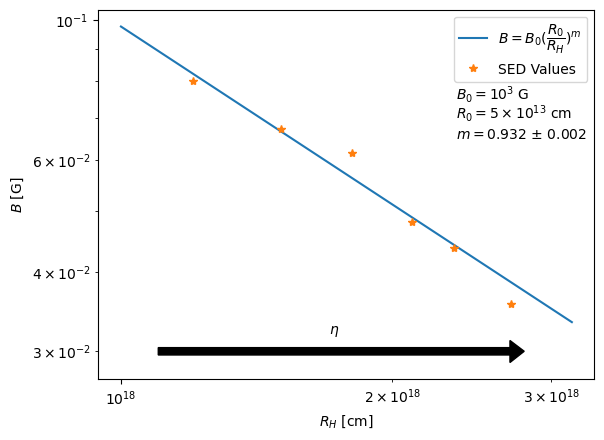

In [272]:
from scipy.optimize import curve_fit

def func(x,m):
    return 1e3*(5e13/x)**(m)

x = np.array([R_H5,R_H8,R_H1,R_H15,R_H2,R_H3])
y = np.array([B5,B8,B1,B15,B2,B3])

param, pcov = curve_fit(func, x, y, bounds=([0.90], [1.2]))

x2 = np.logspace(18,18.5,1000)
ans = func(x2,param[0])
m = np.round(param[0],3)
plt.loglog(x2,ans,label=fr'$B=B_0(\dfrac{{R_0}}{{R_{{H}}}})^{{m}}$')
plt.loglog(x,y,"*",label="SED Values")
plt.text(2.35e18,7.5e-2, r'$B_{0} = 10^{{3}}$ G')
plt.text(2.35e18,7e-2, r'$R_{0} = 5\times10^{{13}}$ cm')
plt.text(2.35e18,6.5e-2, fr'$m = {np.round(param[0],3)}$ $\pm$ {np.round(np.sqrt(float(np.diag(pcov))),4)}')
plt.arrow(x=1.1e18, y=0.03, dx=1.6e18, dy=0.0, width=.0008, color="k", head_length = 1e17) 
plt.annotate(r'$\eta$', xy = (1.7e18, 0.032))
plt.xlabel(r"$R_{H}$ [cm]")
plt.ylabel(r"$B$ [G]")
plt.savefig('BvR_H.png')
plt.legend()
plt.show()